# **Problem Statement**


---

#### **Business Context**  
Understanding customer personality and behavior is pivotal for businesses to enhance customer satisfaction and increase revenue. Segmentation based on a customer's personality, demographics, and purchasing behavior allows companies to create tailored marketing campaigns, improve customer retention, and optimize product offerings.  

A leading retail company with a rapidly growing customer base seeks to gain deeper insights into their customers' profiles. The company recognizes that understanding customer personalities, lifestyles, and purchasing habits can unlock significant opportunities for personalizing marketing strategies and creating loyalty programs. These insights can help address critical business challenges, such as improving the effectiveness of marketing campaigns, identifying high-value customer groups, and fostering long-term relationships with customers.  

With the competition intensifying in the retail space, moving away from generic strategies to more targeted and personalized approaches is essential for sustaining a competitive edge.  

---

#### **Objective**  
In an effort to optimize marketing efficiency and enhance customer experience, the company has embarked on a mission to identify distinct customer segments. By understanding the characteristics, preferences, and behaviors of each group, the company aims to:  
1. Develop personalized marketing campaigns to increase conversion rates.  
2. Create effective retention strategies for high-value customers.  
3. Optimize resource allocation, such as inventory management, pricing strategies, and store layouts.  

As a data scientist tasked with this project, your responsibility is to analyze the given customer data, apply machine learning techniques to segment the customer base, and provide actionable insights into the characteristics of each segment.  

---

#### **Data Dictionary**  
The dataset includes historical data on customer demographics, personality traits, and purchasing behaviors. Key attributes are:  

1. **Customer Information**  
   - **ID:** Unique identifier for each customer.  
   - **Year_Birth:** Customer's year of birth.  
   - **Education:** Education level of the customer.  
   - **Marital_Status:** Marital status of the customer.  
   - **Income:** Yearly household income (in dollars).  
   - **Kidhome:** Number of children in the household.  
   - **Teenhome:** Number of teenagers in the household.  
   - **Dt_Customer:** Date when the customer enrolled with the company.  
   - **Recency:** Number of days since the customer’s last purchase.  
   - **Complain:** Whether the customer complained in the last 2 years (1 for yes, 0 for no).  

2. **Spending Information (Last 2 Years)**  
   - **MntWines:** Amount spent on wine.  
   - **MntFruits:** Amount spent on fruits.  
   - **MntMeatProducts:** Amount spent on meat.  
   - **MntFishProducts:** Amount spent on fish.  
   - **MntSweetProducts:** Amount spent on sweets.  
   - **MntGoldProds:** Amount spent on gold products.  

3. **Purchase and Campaign Interaction**  
   - **NumDealsPurchases:** Number of purchases made using a discount.  
   - **AcceptedCmp1:** Response to the 1st campaign (1 for yes, 0 for no).  
   - **AcceptedCmp2:** Response to the 2nd campaign (1 for yes, 0 for no).  
   - **AcceptedCmp3:** Response to the 3rd campaign (1 for yes, 0 for no).  
   - **AcceptedCmp4:** Response to the 4th campaign (1 for yes, 0 for no).  
   - **AcceptedCmp5:** Response to the 5th campaign (1 for yes, 0 for no).  
   - **Response:** Response to the last campaign (1 for yes, 0 for no).  

4. **Shopping Behavior**  
   - **NumWebPurchases:** Number of purchases made through the company’s website.  
   - **NumCatalogPurchases:** Number of purchases made using catalogs.  
   - **NumStorePurchases:** Number of purchases made directly in stores.  
   - **NumWebVisitsMonth:** Number of visits to the company’s website in the last month.  

# **Let's start coding!**

## **Importing necessary libraries**

In [ ]:
# Bibliotecas para ler e manipular dados
# Libraries to read and manipulate data
import pandas as pd
import numpy as np

# Bibliotecas para visualização dos dados
# libaries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Remoção de limites de número de colunas e definição do número de linhas mostradas na tela
# Removal of the limit for the number of displayed columns and defining number of rows to be displayed on the screen
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)

# Bibliotecas relacionadas a clusterização
# Libraries associated iwth clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
#from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

#import matplotlib.ticker as ticker

# Bibliotecas para análise exploratória e estatística
# Libraries for exploratory and statistical analysis
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.multioutput import MultiOutputRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve,recall_score

from sklearn.model_selection import cross_validate

#import plotly.express as px
#import plotly.graph_objects as go
#from plotly.subplots import make_subplots


# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from statsmodels.tsa.seasonal import seasonal_decompose

# to suppress warnings
import warnings

warnings.filterwarnings("ignore")

## **Loading the data**

In [ ]:
from google.colab import drive  # Connecting Google Colab with Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


### 🔍 First steps

Entendendo e estruturando dados, e criação de novas variáveis.
Understanding and structuring data, and feature engineering

In [ ]:
# Carregando a tabela CSV como uma dataframe da biblioteca pandas
# Loading csv table as a pandas dataframe
data = pd.read_csv("/content/drive/MyDrive/Sample_Superstore.csv", encoding='latin1')  # Loading csv table as a pandas dataframe https://www.kaggle.com/code/aymannegm/supermarket-sales-analysis

In [ ]:
# Checando informações estruturais dos dados
# Checking structural data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [ ]:
# Checando por valores nulos em cada coluna
# Checking for missing values in each column
data.isna().sum()


,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [ ]:
# Checando por linhas duplicadas em cada coluna
# Checking for duplicated rows in each column
duplicated = data.duplicated().sum()
print (duplicated)

0


📝 **Observações:** Nós Temos 9994 linhas de dados de vendas e 21 colunas. Não há valores nulos e nem duplicados. A maioria das variáveis são categóricas.

📝 **Observations:** We have 9994 sales data rows and 21 columns. There's neither missing nor duplicated data. Most of the features are categorical.

**Criação de novas variáveis:** Aqui estamos criando novas variáveis referente à datas de venda e remessa, estação do ano, tipo de dia (semana ou final de semana) e atraso na remessa.


**Feature engineering:** Here we are creating new features related to sales and shipment date, season, day type (week or weekend) and shipment delay.


In [ ]:
# Transformando as colunas date e datetime para tipo data
# Transforming date and datetime columns to datetime type
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Ship Date'] = pd.to_datetime(data['Ship Date'])

In [ ]:
# Separando data em ano, mês, dia e hora para venda e remessa
# Splitting date into year, month, day and hour for sales and shipment
data["Order_day"] = data["Order Date"].dt.day
data["Order_month"] = data["Order Date"].dt.month
data["Order_year"] = data["Order Date"].dt.year

data["Ship_day"] = data["Ship Date"].dt.day
data["Ship_month"] = data["Ship Date"].dt.month
data["Ship_year"] = data["Ship Date"].dt.year


In [ ]:
# Criando variável day_type contendo informação de 'dia da semana ou final de semana' para venda e remessa
# Creating a new feature day_type having information of 'weekday or weekend'for sales and shipment
data['Order_Day_Type'] = data['Order Date'].dt.dayofweek.apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')
data['Ship_Day_Type'] = data['Ship Date'].dt.dayofweek.apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

In [ ]:
# Criando função que associa meses às estações do ano
# Creating function that associates months with seasons of the year
# Define a function to map month to season
def month_to_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'

# Aplicando a função e criando nova variável 'Season' para vendas e remessa
# Applying the function and creating a new column 'Season' for sales and shipment
data['Order_Season'] = data['Order Date'].dt.month.apply(month_to_season)
data['Ship_Season'] = data['Ship Date'].dt.month.apply(month_to_season)

# Criando coluna com o nome do dia para vendas e remessa
# Creating 'Day of Week' column for sales and shipment
data['Order_DayOfWeek'] = data['Order Date'].dt.day_name()
data['Ship_DayOfWeek'] = data['Ship Date'].dt.day_name()

In [ ]:
# Criando coluna de atraso na remessa
# Creating shipment delay column
data['Ship_Delay_Days'] = (data['Ship Date'] - data['Order Date']).dt.days

data[['Order Date', 'Ship Date', 'Ship_Delay_Days']].head()

,Order Date,Ship Date,Ship_Delay_Days
0,2016-11-08,2016-11-11,3
1,2016-11-08,2016-11-11,3
2,2016-06-12,2016-06-16,4
3,2015-10-11,2015-10-18,7
4,2015-10-11,2015-10-18,7


📝 **Observações:** Agora, para nos certificarmos de que não há confusões no dados, iremos checar se há produtos com ID em mais de uma categoria e também sub-categoria. Dessa forma, confirmando que cada produto pertence à apenas uma categoria e sub-categoria.

📝 **Observations:** Now, we will make sure there are no data confusion, we will check if there are products with ID belonging to more than one category and sub-category. This way, we confirm that each product belogns to only one category and sub-category.

In [ ]:
# Agrupando id do produto por sub-categoria
# Grouping Product ID by sub-category
# Count unique combinations of Category + Sub-Category for each Product ID
product_cat_subcat = data.groupby('Product ID')[['Category','Sub-Category']].nunique()

# Filtrando produtos que aparecem em mais de categoria ou mais de uma sub-categoria
# Filter products that belong to more than one category or more than one sub-category
products_in_multiple_cat_or_subcat = product_cat_subcat[
    (product_cat_subcat['Category'] > 1) | (product_cat_subcat['Sub-Category'] > 1)
]

# Salvando e mostrando resultado do agrupamento e filtro
# Saving and displaying the results of grouping and filtering
result = (
    data[data['Product ID'].isin(products_in_multiple_cat_or_subcat.index)]
    [['Product ID', 'Product Name', 'Category', 'Sub-Category']]
    .drop_duplicates()
    .sort_values('Product ID')
)

result

,Product ID,Product Name,Category,Sub-Category


📝 **Observações:** Cada produto pertence a apenas uma categoria e sub-categoria.

📝 **Observations:** Each product belongs to a single category and sub-category.

In [ ]:
# Estatística descritiva das variavéis numéricas
# Statistical description of numerical features
data.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit,Order_day,Order_month,Order_year,Ship_day,Ship_month,Ship_year,Ship_Delay_Days
count,9994.000000,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,55190.379428,229.858001,3.789574,0.156203,28.656896,15.468481,7.809686,2015.722233,15.883730,7.743146,2015.737442,3.958175
min,1.000000,2014-01-03 00:00:00,2014-01-07 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000,1.000000,1.000000,2014.000000,1.000000,1.000000,2014.000000,0.000000
25%,2499.250000,2015-05-23 00:00:00,2015-05-27 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750,8.000000,5.000000,2015.000000,8.000000,5.000000,2015.000000,3.000000
50%,4997.500000,2016-06-26 00:00:00,2016-06-29 00:00:00,56430.500000,54.490000,3.000000,0.200000,8.666500,15.000000,9.000000,2016.000000,16.000000,9.000000,2016.000000,4.000000
75%,7495.750000,2017-05-14 00:00:00,2017-05-18 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000,23.000000,11.000000,2017.000000,24.000000,11.000000,2017.000000,5.000000
max,9994.000000,2017-12-30 00:00:00,2018-01-05 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000,31.000000,12.000000,2017.000000,31.000000,12.000000,2018.000000,7.000000
std,2885.163629,NaN,NaN,32063.693350,623.245101,2.225110,0.206452,234.260108,8.748327,3.284654,1.123555,8.802677,3.340476,1.126141,1.747567


In [ ]:
# Estatística descritiva das variavéis categoricas
# Statistical description of categorical features
data.describe(include='object').T

,count,unique,top,freq
Order ID,9994,5009,CA-2017-100111,14
Ship Mode,9994,4,Standard Class,5968
Customer ID,9994,793,WB-21850,37
Customer Name,9994,793,William Brown,37
Segment,9994,3,Consumer,5191
Country,9994,1,United States,9994
City,9994,531,New York City,915
State,9994,49,California,2001
Region,9994,4,West,3203
Product ID,9994,1862,OFF-PA-10001970,19


📝 **Observações:**

*   Média de vendas foi de 229.85$
*   Média de lucro foi de 28.65$
*   O máximo de disconto dado foi de 80%
*   O tempo médio de atraso nas remessas foi de 3.95 dias
*   Temos apenas um país, mas quatro regiões e 531 cidades
*   Temos três categorias de produtos e 17 sub-categorias
*   Temos dados de vendas entre inicio de 2014 e final de 2017

📝 **Observations:**

*   Average sales was 229.85$
*   Average profit was 28.65$
*   Maximum discount given was 80%
*   Average delay time was 3.95 days
*   We have only one country, but four regions and 531 cities
*   We have three product categories and 17 sub-categories
*   We have sales data from the beginning of 2014 to the end of 2017


In [ ]:
# Fazendo cópia dos dados em novo objeto
# Copying the data into a new variable
data_copy = data.copy()

## **Exploratory Data Analysis**


### 🔍 Univariate data analysis. Análise de dados univariada.



⚠️**Análise da distribuição das variáveis numéricas:** Aqui vamos checar se há outliers (dados extremos) e o comportamento geral de cada variável numérica.

⚠️**Distribution analysis of numerical features:** Here we will check for outliers (extreme values) and the general behaviour of each numerical feature.

In [ ]:
# Selecionando apenas variáveis numéricas e considerando apenas o quartil 25 e 75
# Selecting only numerical features and considering only quantile 25th and 75th percentile
Q1= data.select_dtypes(include=np.number).quantile(0.25)
Q3= data.select_dtypes(include=np.number).quantile(0.75)

In [ ]:
# Calculando a porcentagem de outliers para cada variável
# Calculating outlier percentage for each feature
IQR = Q3 - Q1

lower_whisker = (
 Q1 - 1.5* IQR
)

upper_whisker = (
 Q3 + 1.5* IQR
)

(
data.select_dtypes(include=np.number)< lower_whisker | (data.select_dtypes(include=np.number) > upper_whisker)).sum()/data.select_dtypes(include=np.number).shape[0]*100

,0
Row ID,0.000000
Postal Code,0.000000
Sales,0.080048
Quantity,0.000000
Discount,100.000000
Profit,22.033220
Order_day,0.000000
Order_month,0.000000
Order_year,0.000000
Ship_day,0.000000


In [ ]:
# Guardando apenas colunas numéricas em novo objeto
# Storing numerical columns into a new variable
data_num= data.select_dtypes(include=np.number)

Row ID
Skew : 0.0


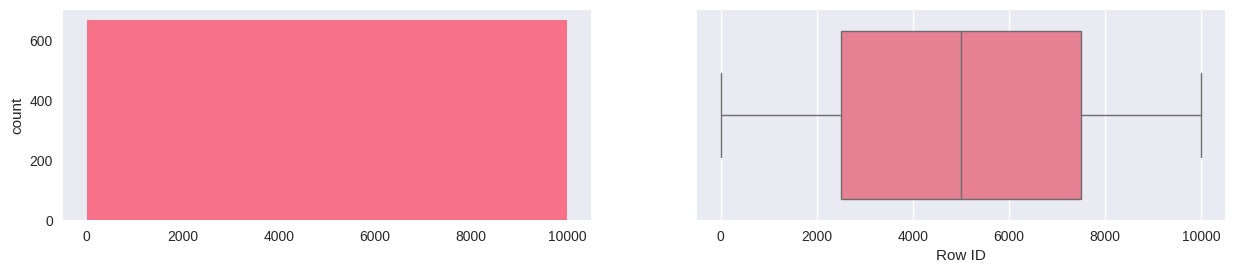

Postal Code
Skew : -0.13


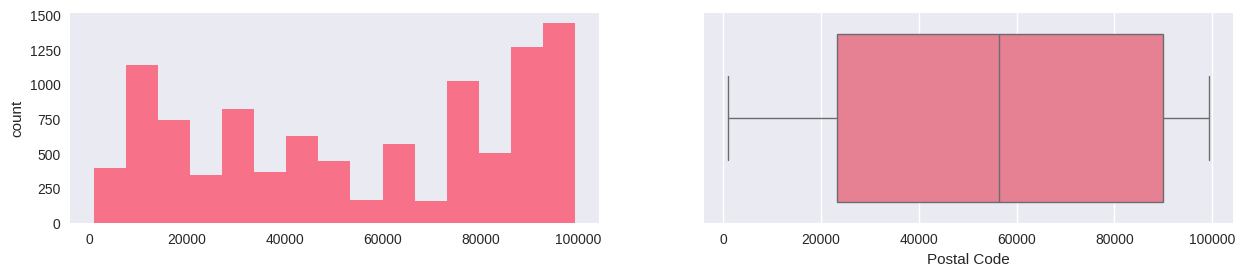

Sales
Skew : 12.97


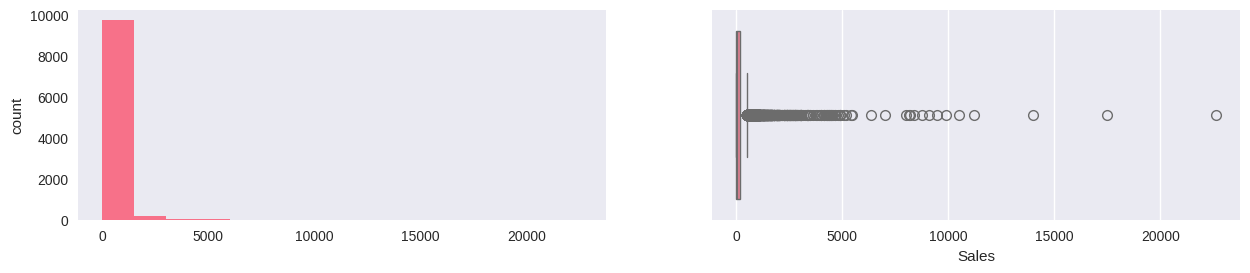

Quantity
Skew : 1.28


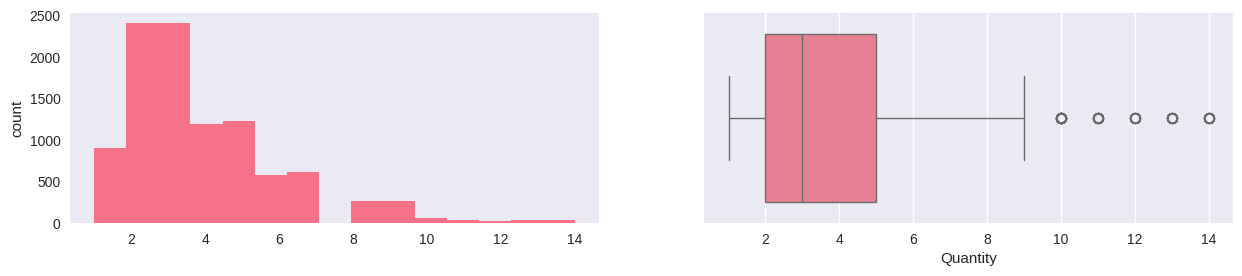

Discount
Skew : 1.68


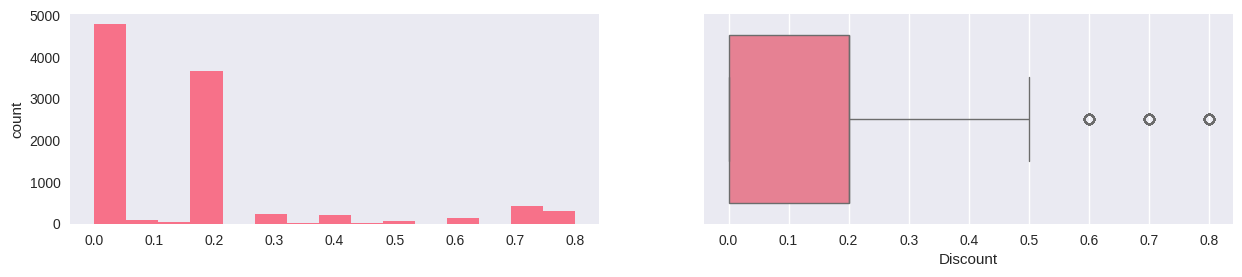

Profit
Skew : 7.56


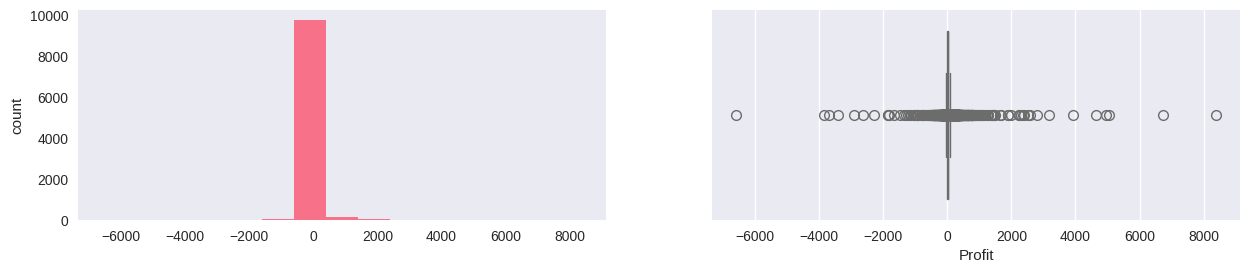

Order_day
Skew : 0.02


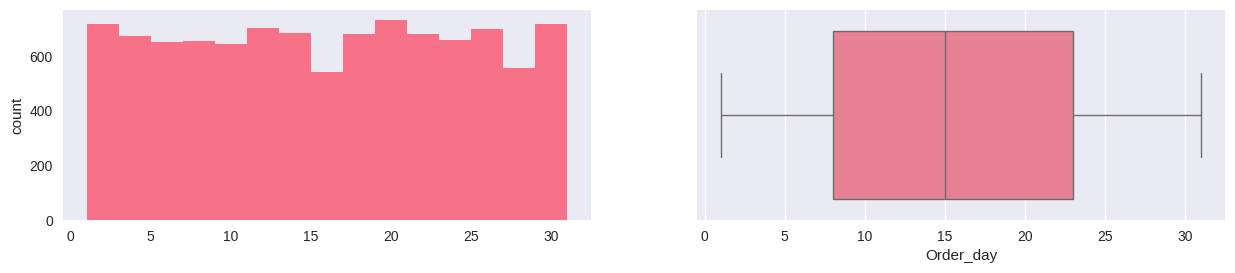

Order_month
Skew : -0.43


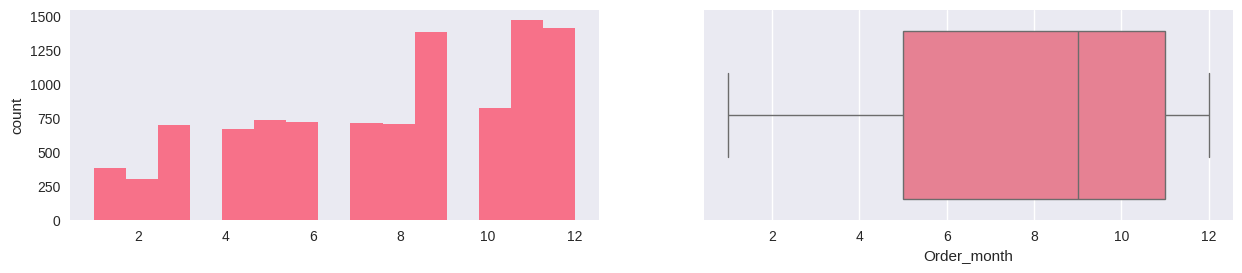

Order_year
Skew : -0.28


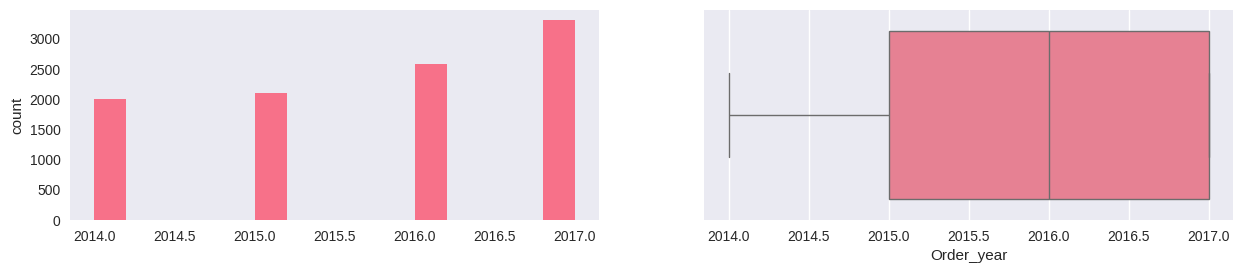

Ship_day
Skew : -0.01


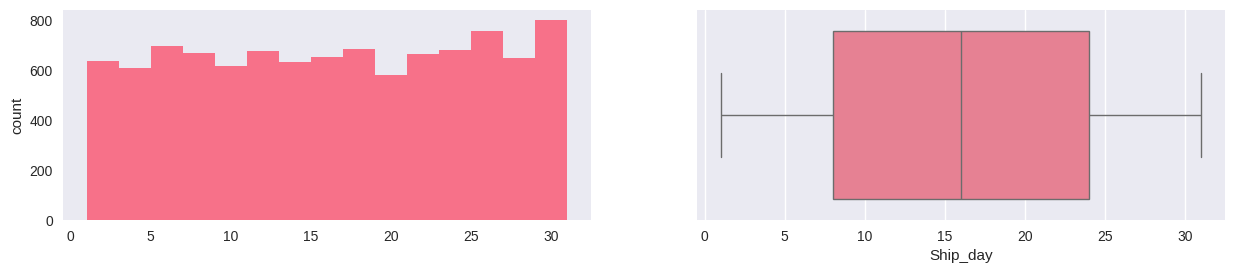

Ship_month
Skew : -0.43


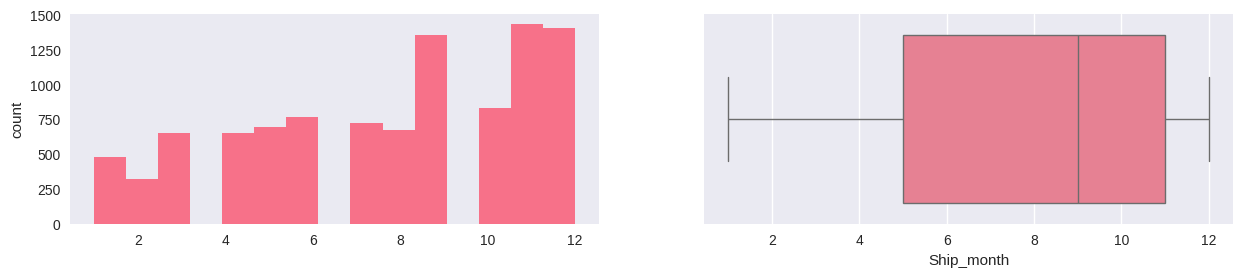

Ship_year
Skew : -0.27


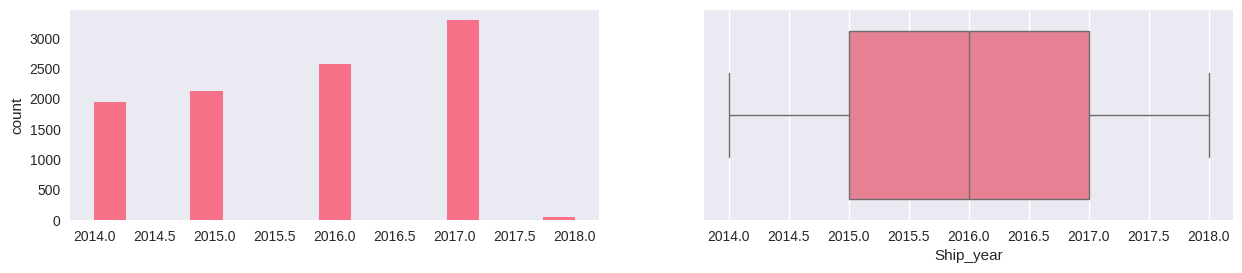

Ship_Delay_Days
Skew : -0.42


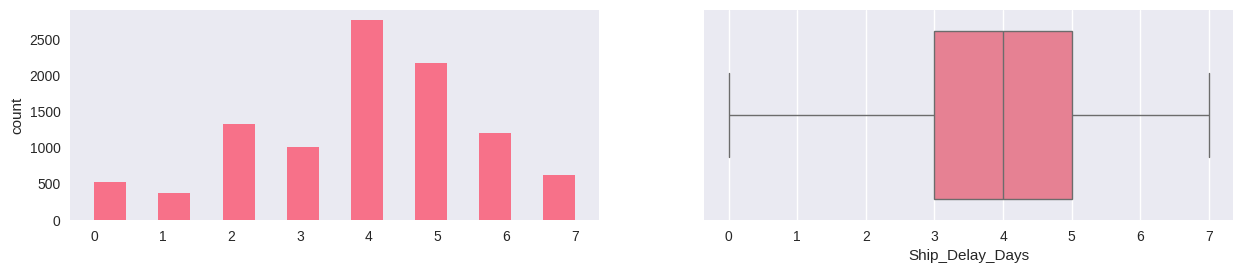

In [ ]:
# Histograma and boxplot de cada variável numérica contendo seus respectivos valores de assimetria
# Histogram and boxplot for each numerical feature having their respective skewness values
for col in data_num.columns:
    print(col)
    print('Skew :',round(data_num[col].skew(),2))
    plt.figure(figsize=(15,6))
    plt.subplot(2,2,1)
    data_num[col].hist(bins=15, grid=False)
    plt.ylabel('count')
    plt.subplot(2,2,2)
    sns.boxplot(x=data_num[col])
    plt.show()

📝 **Observações:** No geral os dados não apresentam outliers. Contudo, para duas variáveis chave (Sales e Profit) há uma quantidade considerável de outliers, ou seja a maioria das vendas são de valores baixos, e vendas com valores mais altos apresentam baixa frequência nos dados. Já para profit, percebemos que o lucro tem uma margem que no geral está em torno de valores pequenos, enquanto que existem muitos valores extremos tanto positivos quanto negativos, o que indica que há vendas que geraram perda financeira.


📝 **Observations:** In general, the data doesn't have outliers. However, for two key features (Sales and Profit) there is a considerable amount of outliers, hence most of sales have mostly low values, and sales with higher values have lower frequency in the data. For profit, on the other hand, we notice that it has a margin that is mainly around low values, while there exists extreme positive and negative values, which indicates that some sales led to finantial loss.

### 🔍 Bivariate data analysis. Análise de dados bivariada.

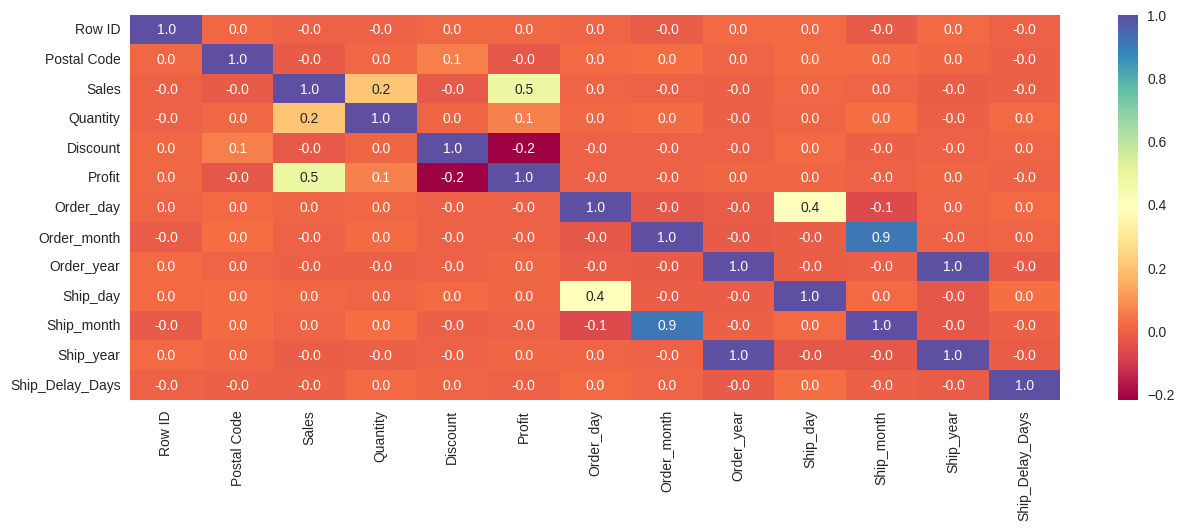

In [ ]:
# Mapa de calor da correlação entre as variáves numéricas
# Heatmap of the correlation between numerical variables
plt.figure(figsize=(15,5))
sns.heatmap(data.select_dtypes(include='number').corr(),cmap='Spectral', annot=True, fmt='0.1f')
plt.show()

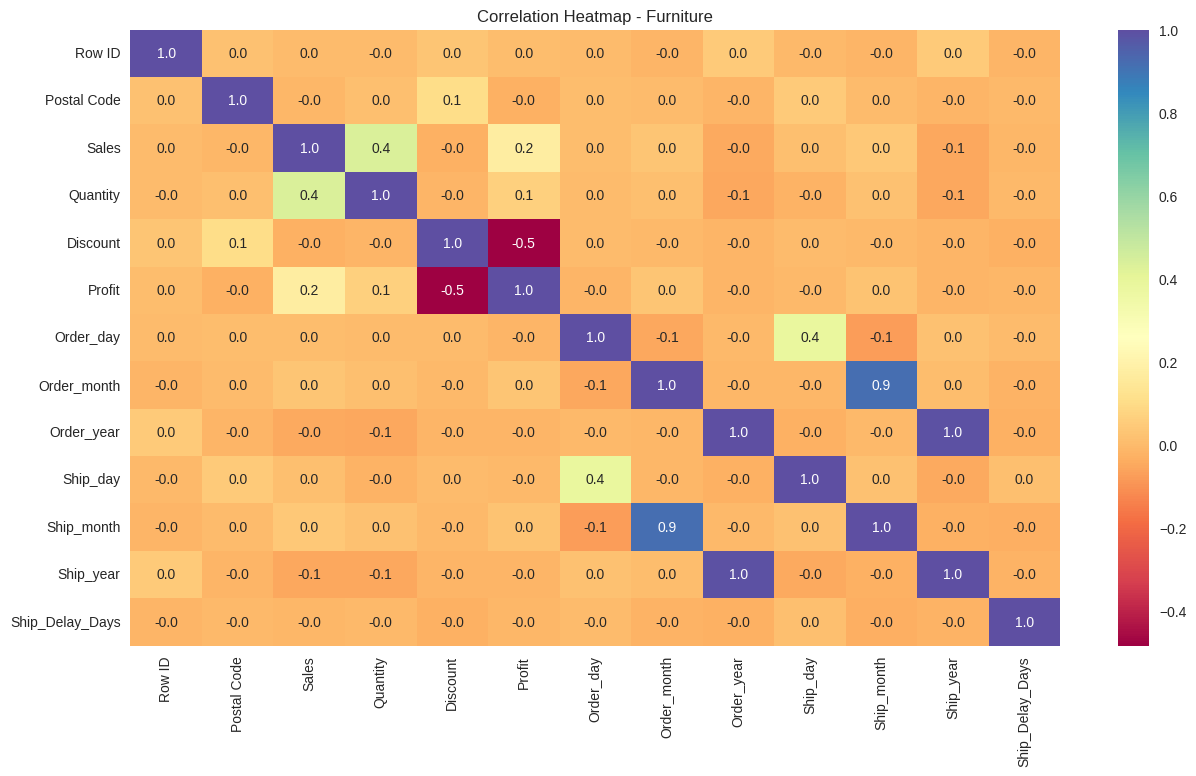

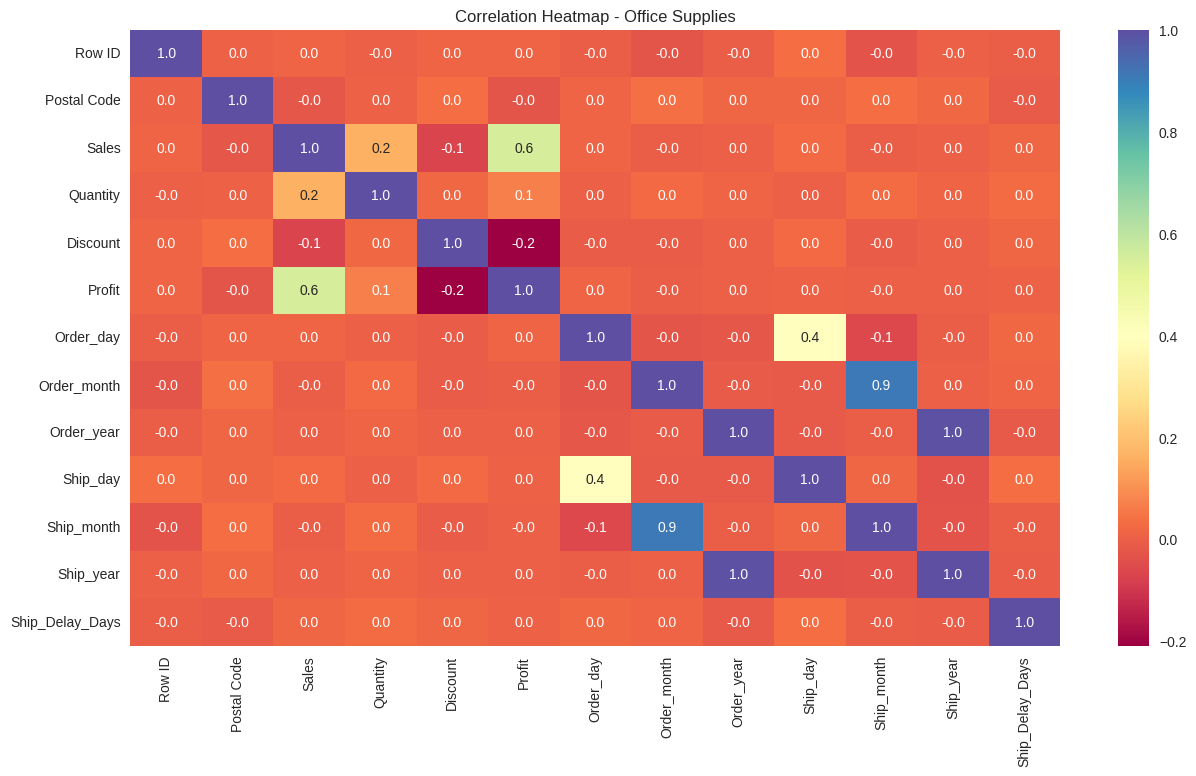

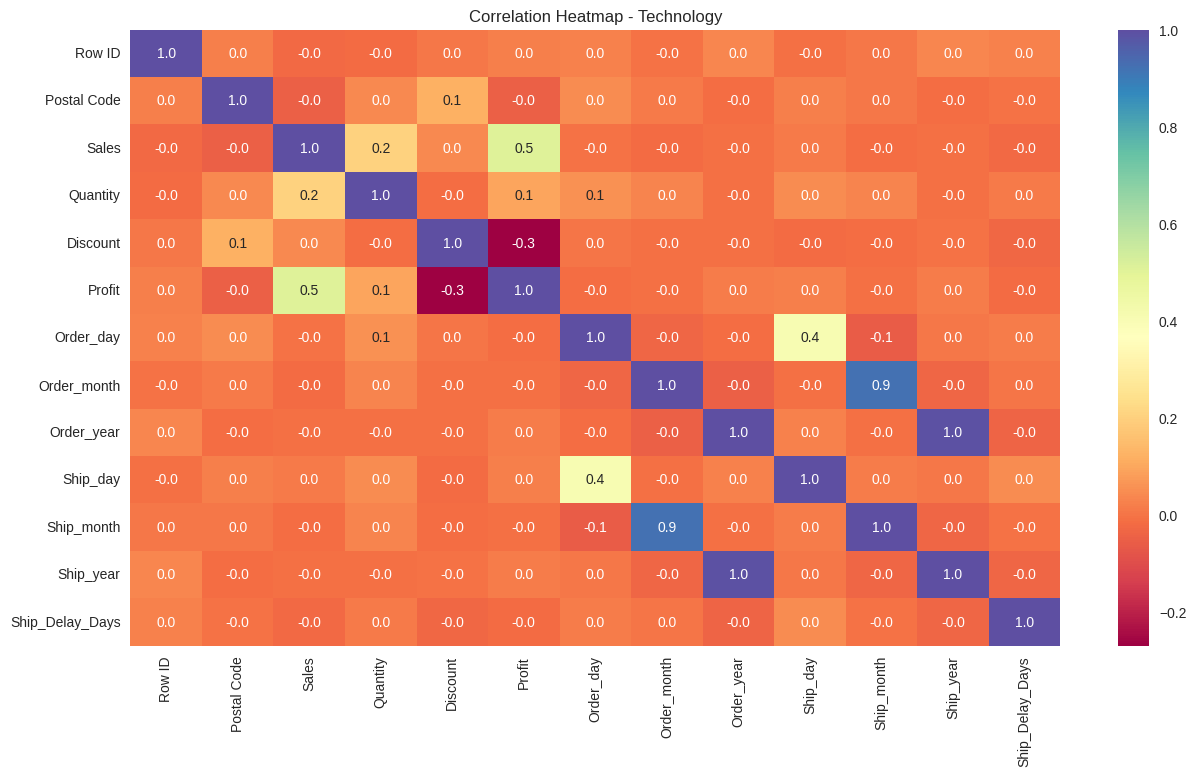

In [ ]:
# Mapa de calor da correlação entre as variáves numéricas para cada tipo de café
# Heatmap of the correlation between numerical variables for each coffee type
for category in data['Category'].unique():
    # Filter numeric columns for this category
    data_cat = data[data['Category'] == category]
    data_cat_num = data_cat.select_dtypes(include='number')  # only numeric columns

    # Plot heatmap
    plt.figure(figsize=(15,8))
    sns.heatmap(data_cat_num.corr(), cmap='Spectral', annot=True, fmt='.1f')
    plt.title(f'Correlation Heatmap - {category}')
    plt.show()

📝 **Observações:** No geral, variávies de data de envio da remessa e data de venda estão positivamente correlacionadas, como já esperado. Outra correlação positiva é entre vendas e lucro e vendas e quantidade, ou seja, quanto maior a venda maior o lucro, e quanto maior a quantidade vendida maior a venda. E existe uma relação negativa importante: desconto x lucro, com maior desconto há queda dos lucros, mas isso varia de acordo com a categoria.


*   Produtos de mobília tiveram maior correlação negativa entre desconto e lucro, com valor de -0.5

*   Produtos de tecnologia tiveram a segunda maior correlação negativa entre desconto e lucro, com valor de -0.3, enquanto produtos de material de escritório tiveram valor de -0.2

*   A relação positiva entre vendas e lucro varia de acordo com a categoria: 0.2 para mobília, 0.5 para tecnologia e 0.6 para material de escritório. Ou seja, vendas com valores muito altos nem sempre indicam maior lucro, especialmente para mobília


📝 **Observations:** In general, features related to shipment and sales date are positively correlated, as expected. Another positive correlation is between sales and profit and sales and quantity, meaning that the higher the sales the higher the profit, and the higher the quantity sold the higher the sales value. Moreover, there is an important negative relationship: discount x profit, a higher discount meaning a drop in profit, but that varies according to category.


*   Furniture products has the highest negative correlation between discount and profit, with a value of -0.5


*   Technology products had the second highest negative correlation between discount and profit, with a value of -0.3, meanwhile office supply products had a value of -0.2


*   The positive relationship between sales and profit varies according to category: 0.2 for furniture, 0.5 for techonology and 0.6 for office supplies. This means that high-valued sales do not always indicate higher profit, especially for furniture



##### **Observação:** Agora vamos investigar como o lucro varia ao longo do tempo.

##### **Observations:** Now we will investigate how profit varies across time.

In [ ]:
# Lucro total por ano e mês
# Total profit by year and month
data.groupby(['Order_year', 'Order_month'])['Profit'].sum().T # .groupby is combined with .count to sum the number of each particular education value, .T transposes the table

Order_year  Order_month
2014        1               2450.1907
            2                862.3084
            3                498.7299
            4               3488.8352
            5               2738.7096
            6               4976.5244
            7               -841.4826
            8               5318.1050
            9               8328.0994
            10              3448.2573
            11              9292.1269
            12              8983.5699
2015        1              -3281.0070
            2               2813.8508
            3               9732.0978
            4               4187.4962
            5               4667.8690
            6               3335.5572
            7               3288.6483
            8               5355.8084
            9               8209.1627
            10              2817.3660
            11             12474.7884
            12              8016.9659
2016        1               2824.8233
            2               5004.5795
            3               3611.9680
            4               2977.8149
            5               8662.1464
            6               4750.3781
            7               4432.8779
            8               2062.0693
            9               9328.6576
            10             16243.1425
            11              4011.4075
            12             17885.3093
2017        1               7140.4391
            2               1613.8720
            3              14751.8915
            4                933.2900
            5               6342.5828
            6               8223.3357
            7               6952.6212
            8               9040.9557
            9              10991.5556
            10              9275.2755
            11              9690.1037
            12              8483.3468
Name: Profit, dtype: float64

📝 **Observações:** Duas considerações importantes devem ser feitas:

*   2017 foi o ano que gerou mais lucro para a empresa

*   Houve meses nos quais o lucro foi negativo, ou seja, houve perda financeira (Julho de 2014 e Janeiro de 2015)


📝 **Observations:** Two important considerations must be made:

*   2017 wass the year that generated the highest profit for the company

*   There were months in which profit was negative, meaning that there was financial loss


📝 **Observações:** A partir das descobertas recentes, vamos obter a porcentagem de perda financeira e criar uma coluna binária onde o valor 0 indica lucro positivo e o valor 1 indica lucro negativo.



📝 **Observations:** From the recent discoveries, we will get the financial loss porcentage and create a binary column where the value 0 indicates positive profit and the value 1 indicates negative profit.



In [ ]:
(data['Profit']<0).sum()/data.shape[0]*100

np.float64(18.721232739643785)

In [ ]:
# Create the loss column where 1 = negative profit, 0 = non-negative profit
data['loss'] = (data['Profit'] < 0).astype(int)

📝 **Observações:** Aqui, temos um sinal de alerta, 18.72% das vendas geraram lucro negativo, ou seja, perda financeira.

📝 **Observations:** Here, there is an alert signal, 18.72% of sales generated a negative profit, meaning financial loss.

##### 📝**Observação:** Já que encontramos algumas relações importantes entre desconto e lucro e que isso pode variar de acordo com a categoria de produtos, vamos investigar um pouco mais a fundo essas relações.

##### 📝**Observations:** Since we found some important relationships between discount and profit and that it can vary according to products category, we will further investigate these relationships.

Correlation between discount and profit by year:
Order_year
2014    0.042345
2015   -0.464213
2016   -0.196667
2017   -0.757336
dtype: float64


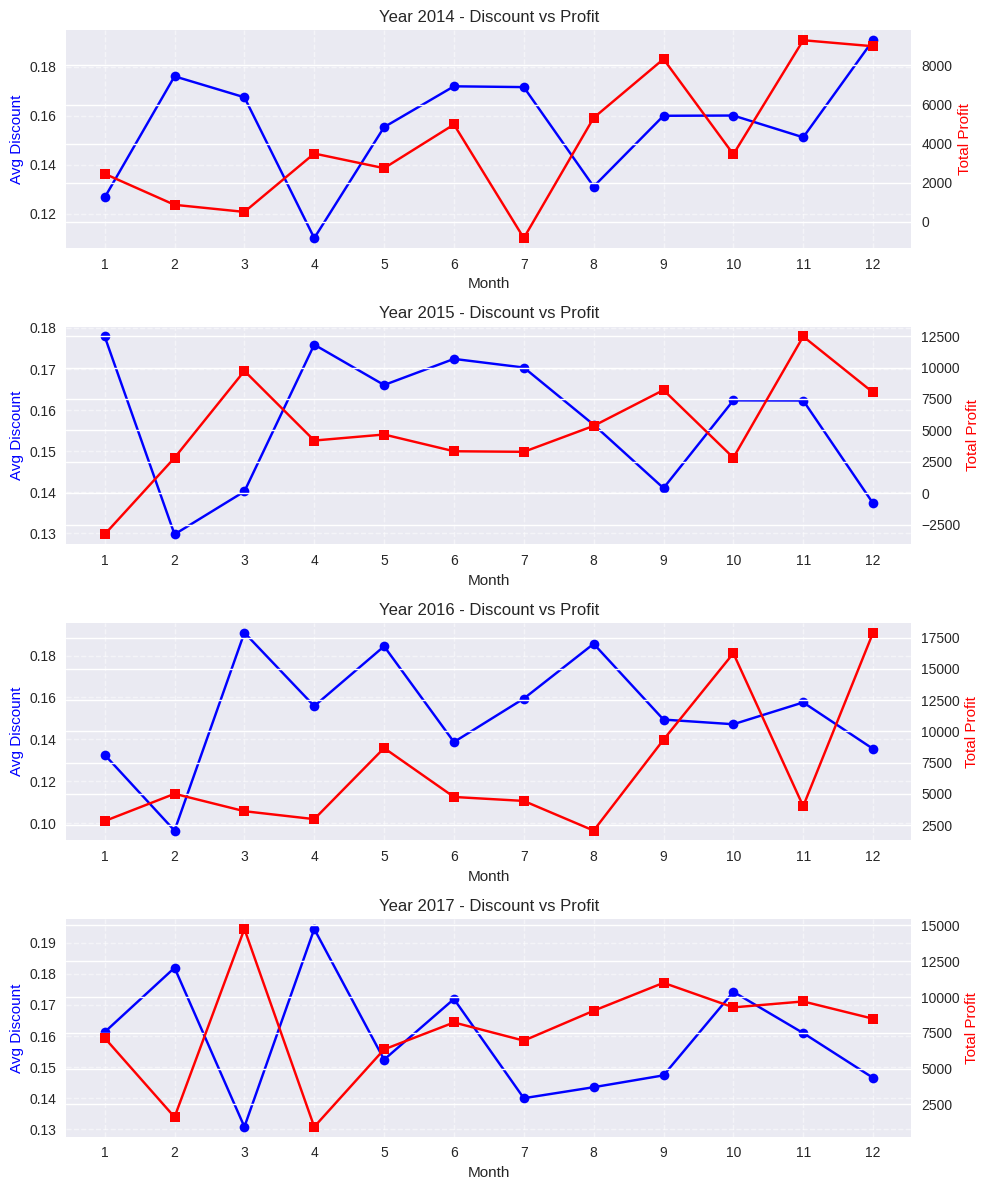

In [ ]:
monthly_summary = (
    data.groupby(['Order_year', 'Order_month'])
    .agg(avg_discount=('Discount', 'mean'),
         total_profit=('Profit', 'sum'))
    .reset_index()
)

# Check correlation between discount and profit per year
correlations = (
    monthly_summary.groupby('Order_year')
    .apply(lambda x: x['avg_discount'].corr(x['total_profit']))
)

print("Correlation between discount and profit by year:")
print(correlations)

# Optional: plot relationship
import matplotlib.pyplot as plt

# Line plot of monthly avg discount and profit by year
fig, axes = plt.subplots(len(monthly_summary['Order_year'].unique()), 1, figsize=(10, 12))

for i, year in enumerate(sorted(monthly_summary['Order_year'].unique())):
    yearly_data = monthly_summary[monthly_summary['Order_year'] == year]

    ax = axes[i]
    ax.plot(yearly_data['Order_month'], yearly_data['avg_discount'], marker='o', color='blue', label='Avg Discount')
    ax.set_ylabel("Avg Discount", color='blue')
    ax.set_xlabel("Month")
    ax.set_title(f"Year {year} - Discount vs Profit")

    # Twin axis for profit
    ax2 = ax.twinx()
    ax2.plot(yearly_data['Order_month'], yearly_data['total_profit'], marker='s', color='red', label='Total Profit')
    ax2.set_ylabel("Total Profit", color='red')

    # Improve layout
    ax.set_xticks(range(1,13))
    ax.grid(True, linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()

##### 📝**Observação:** Percebemos que para o ano de 2014, houve correlação positiva, porém baixa, entre desconto e lucro, ou seja, oferecer descontos no geral gerou mais lucro para a empresa. Porém, e os  anos subsequentes houve uma relação negativa, contudo é possível perceber que nem sempre o aumento no desconto levou à queda do lucro, exemplos: entre fevereiro e março de 2015, entre abril e maio de 2016 e entre maio e junho de 2017.

##### 📝**Observations:** We can notice that for the year 2014 there was a positive correlation, despite low, between discont and profit, meaning that offering more discount mainly led to higher profit for the company. However, for the following years tehre was a negative relationship, despite that it is possible to see that an increase in discount do not always lead to a drop in profit, examples: between February and March of 2015, between April and May of 2016 and between May and June of 2017.

In [ ]:
# Checando a quantidade de lucro total por café
# Checking total profit per coffee
data.groupby(['Category','Sub-Category'])['Sales'].sum().sort_values(ascending=False)

Category         Sub-Category
Technology       Phones          330007.0540
Furniture        Chairs          328449.1030
Office Supplies  Storage         223843.6080
Furniture        Tables          206965.5320
Office Supplies  Binders         203412.7330
Technology       Machines        189238.6310
                 Accessories     167380.3180
                 Copiers         149528.0300
Furniture        Bookcases       114879.9963
Office Supplies  Appliances      107532.1610
Furniture        Furnishings      91705.1640
Office Supplies  Paper            78479.2060
                 Supplies         46673.5380
                 Art              27118.7920
                 Envelopes        16476.4020
                 Labels           12486.3120
                 Fasteners         3024.2800
Name: Sales, dtype: float64

##### 📝**Observação:** Celulares foram os produtos que de longe levaram a maior venda total, seguidos de cadeiras e armazenamento das categorias de mobília e materiais de escritório, respectivamente. Materiais de escritório no geral tiveram vendas mais baixas.

##### 📝**Observations:** Phones were by far the kind of products that led to highest total sales, followed by chairs and storage, from furniture and office supplies categories, respectively. Office Supplies products mostly led to lowest sales.

##### 📝**Observação:** Agora iremos checar como as variáveis desconto, lucro, e variável de tempo e localidade se relacionam entre si.

##### 📝**Observations:** Now we will check how features like discount, profit, features related to time and locality relate to one another.

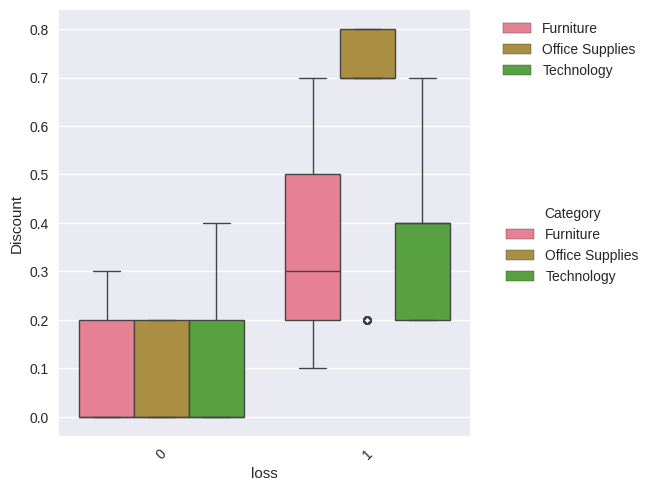

In [ ]:
# Boxplot de desconto e perda (0 = ganho no lucro, 1 = perda no lucro) considerando categoria
# Boxplot of discount and loss (0 = profit gain, 1 = profit loss) considering category
sns.catplot(data=data, x='loss', y='Discount', hue='Category', kind='box')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # moves legend outside
plt.xticks(rotation=45)
plt.show()

<Figure size 800x600 with 0 Axes>

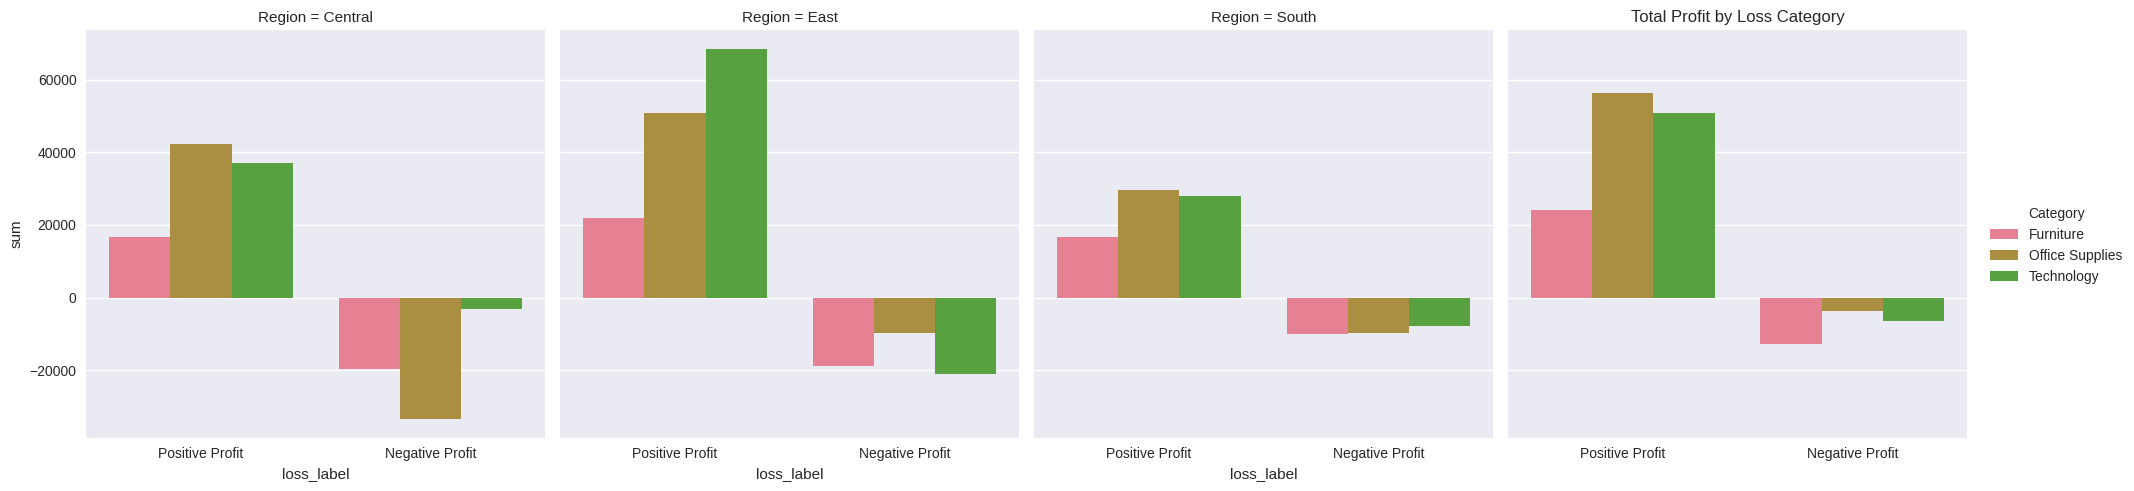

In [ ]:
# Boxplot do total de lucro por região considerando categoria
# Boxplot of total profit per region considering category

summary = data.groupby(['loss', 'Category','Region'])['Profit'].agg(['sum', 'count']).reset_index()
summary['loss_label'] = summary['loss'].map({0: 'Positive Profit', 1: 'Negative Profit'})
# Bar plot of total profit by loss category
plt.figure(figsize=(8, 6))
sns.catplot(data=summary, x='loss_label', y='sum', hue='Category',col='Region', kind='bar')
plt.title('Total Profit by Loss Category')
plt.ylabel('Sum of Profit')
plt.xlabel('')
plt.show()

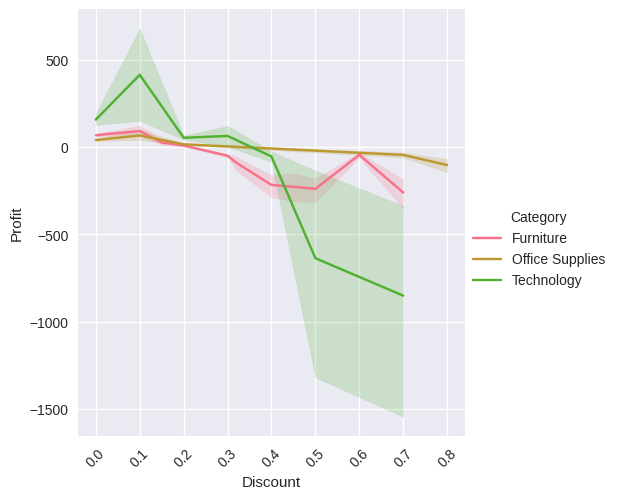

In [ ]:
# Lineplot do lucro e desconto para cada categoria
# Lineplot of profit and discount for each category
sns.relplot(data=data, x='Discount', y='Profit', hue='Category', kind='line')
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # moves legend outside
plt.xticks(rotation=45)
plt.show()

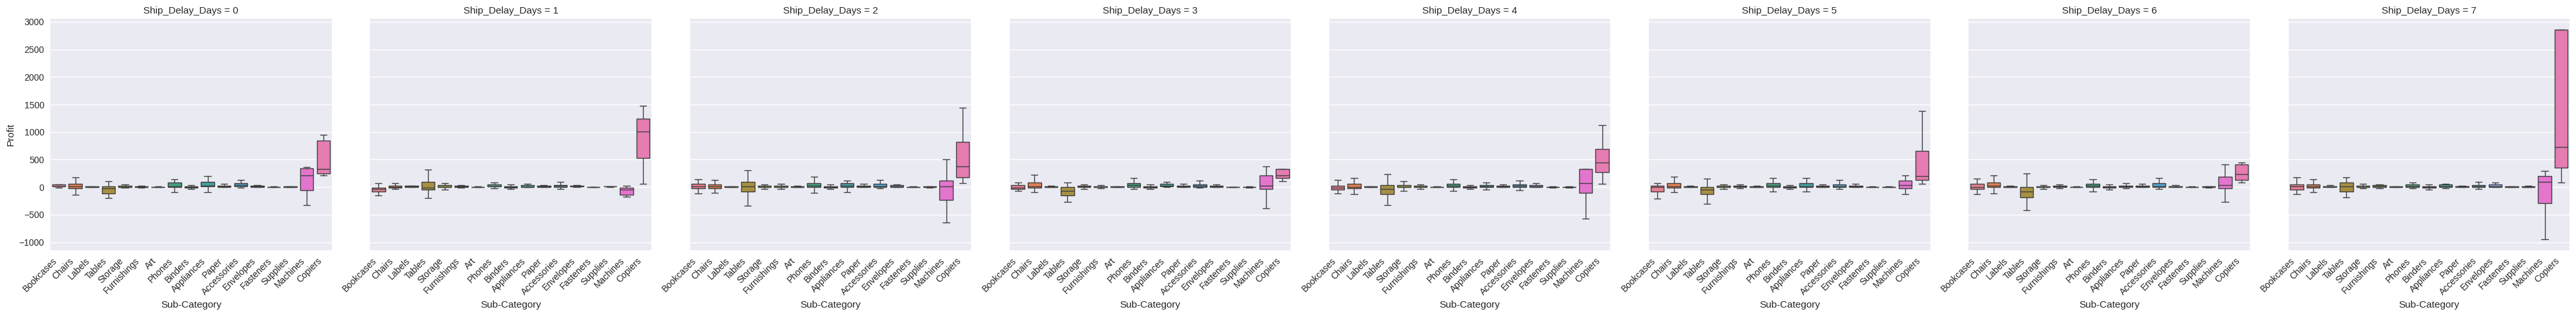

In [ ]:
# Boxplot do lucro por sub-categoria considerando atraso na remessa
# Boxplot of profit by sub-category considering shipment delay

g = sns.catplot(data=data, y='Profit', x='Sub-Category', hue='Sub-Category',
                col='Ship_Delay_Days', kind='box', showfliers=False)

# Rotate x-axis labels on all subplots
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

📝 **Observações:**


*  Quando houve lucro, os descontos aplicados em cada categoria no geral foram os mesmos, por volta de 20%, havendo um pouco mais de desconto para produtos da categoria tecnologia

*   Quando houve perda, materiais de escritório tiveram maior taxa de desconto, no geral entre 70-80%

*   No geral, materiais de escritório geraram maior lucro regional (central, sul e oeste), e tecnologia gerou mais lucro na região leste

*   Se tratando de lucro negativo, materiais de escritório lideraram na região central, tecnologia liderou na região leste, e mobília liderou nas regiões sul e oeste

*   A categoria que mais sofreu variação no lucro com aumento de desconto foi tecnologia. A partir dos 40% de desconto há queda brusca do lucro

*   Materiais de escritório sofreram menor variação no lucro em relação a desconto

*   No geral é possível perceber que por volta de 40% de desconto todas as categorias apresentam lucro negativo

*   No geral, máquinas e copiadoras deram maior retorno nos lucros, especialmente copiadoras, e as outras sub-categorias foram muito similares, independente da quantidade de dias de atraso ou se houve atraso

*   Máquinas também deram maior prejuizo, com vendas dando lucro negativos. Outra sub-categoria que claramente deu mais lucro negativo que as demais foi a de mesas


📝 **Observations:**


*  When there was profit, discounts applied were mainly the same for each category, around 20%, there being a bit higher discount for technology products

* When there was loss, office supplies had the highest discount rate, commonly around 70-80%  

* In general, office supplies generated highest regional profit (central, south and west), and technology had highest profit in the east region   

*   When it comes to negative profit, office supplies led in the central region, technology led in the east region, and furniture led in the south and west regions

*   The category that had largest variation of profit with discount increase was technology. From 40% on of discount there was an abrupt drop in profit


*   Office supplies had the smallest variation of profit in relation to discount

*   In general it is possible to notice that around 40% of discount all categories being to show negative profit

*   Most commonly, machines and copiers generated the highest profit returns, especially copiers, and the others sub-categories were very similar, regardless of the days of shipment of delay or if there was delay in the first place

*   Machines also returned the highest loss, with sales giving negative profit. Another sub-category that clearly gave more negative profit than others was chairs

### 🔍 STATISTICAL ANALYSIS

**Análise estatística:** Aqui, iremos construir um modelo random forest, sendo a nossa variável dependente perda (loss), e as nossas variáveis independentes (que irão explicar as mudanças nas dependentes) vendas, desconto, região, categoria e sub-categoria. Também iremos analisar métricas de acurácia para saber o quanto o modelo se ajusta aos dados de treinamento e aos dados de teste.

**Statistical analysis:** Here, we will initially build a random forest model, our dependent variable being 'loss', and our independent variables (will explain changes in the dependent variables) are sales, discount, region, category and sub-category. Also, we will analyze accuracy metrics to find out how well the model fits the training and testing data.

**Observações:**


*   Muitas colunas são categóricas e não há relação ordinária entre os valores (nível de importância pré-existente)

*   Antes de modelar os dados, nós iremos criar variáveis dummy com as colunas categóricas

*   Diversas colunas binárias (0 para ausência e 1 para presença) serão criadas

*   Sabendo que a coluna de lucro define a coluna de perda (quando está abaixo de zero perda é igual a 1, caso contrário é igual a 0), ela será excluida das análises para evitar vazamento de dados, no qual one variável explicativa poderia predizer perfeitamente a nossa variável de interesse, o que causaria overfitting


**Observations:**


*   Many columns are categorical and there's no ordinal relationship between the values (pre-existing level of importance)

*  Before modelling the data, we'll create dummy variables with those categorical columns

*   Several binary (0 for absence or 1 for presence) columns will be created.

*   Since 'Profit' defines 'loss' (as it's below zero loss is 1, else it's 0) it will excluded from the analysis to prevent data leakage, in which one explanatory variable could perfectly predict our target variable, which would cause overfitting


In [ ]:
data_sel = data[['Sales','loss', 'Discount','Region','Category', 'Sub-Category']]

In [ ]:
data_dummy = pd.get_dummies(
    data_sel,
    columns = data_sel.select_dtypes(include = ["object", "category"]).columns.tolist(),  # selects category and object types of data_modified
    drop_first = True,  # prevents redundant variables
)

In [ ]:
# Aplicando normalização nos dados de contagem de perda para obter proporção de perda (1) vs ganho (0)
# Applying normalization to counts of loss in order to get proportions of loss (1) vs gain (0)
data_dummy['loss'].value_counts(normalize=True)

,proportion
loss,
0,0.812788
1,0.187212


**Observações:** Para modelagem dos dados, primeiro iremos separar as variáveis independentes (x) em um objeto separado da variável dependente (y). Posteriormente, iremos separar os dados em dados de treinamento e dados de teste tanto para x quanto para y e finalmente criar o modelo Random Forest.

**Observations:** In order to model the data, first we'll split independent variables (x) into one separated object and dependent variable (y) into another. Then we'll separate each object on train and test data and finally create the Random Forest model.

In [ ]:
# Separando as variáveis independentes e a variável de interesse
# Separating independent variables and the target variable
x = data_dummy.drop('loss',axis=1)
y = data_dummy['loss']

In [ ]:
# Treinando 70% e testando 30% dos dados com embaralhamento aleatório e estratificaçãode y devido ao desbalanço
# Training (70%) and testing (30%) of the data with random shuffling and stratifying y due to its imbalance
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, shuffle = True, random_state = 1, stratify = y)

In [ ]:
print("Shape of Training set : ", x_train.shape)
print("Shape of test set : ", x_test.shape)

Shape of Training set :  (6995, 23)
Shape of test set :  (2999, 23)


**Observations:** 6995 rows of the data are being used for training the model, while 2999 rows are being used for testing the validity of the model

**Creating a function to plot acuracy metrics:**

**Criando uma função para plotar métricas de acurácia:**


In [ ]:
# Creating metric function
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)  # creating a confusion matrix with actual values vs predicted values from the model
    plt.figure(figsize=(8,5))

    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['0', '1'], yticklabels=['0', '1'])  # heatmap based on the confusion matrix
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

**Creating and running the Random Forest model:**

**Criando e rodando o modelo Random Forest:**


In [ ]:
# Fitting the Random Forest classifier on the training data
rf_estimator = RandomForestClassifier(class_weight = 'balanced', random_state = 1)

rf_estimator.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5685
           1       0.99      1.00      1.00      1310

    accuracy                           1.00      6995
   macro avg       1.00      1.00      1.00      6995
weighted avg       1.00      1.00      1.00      6995



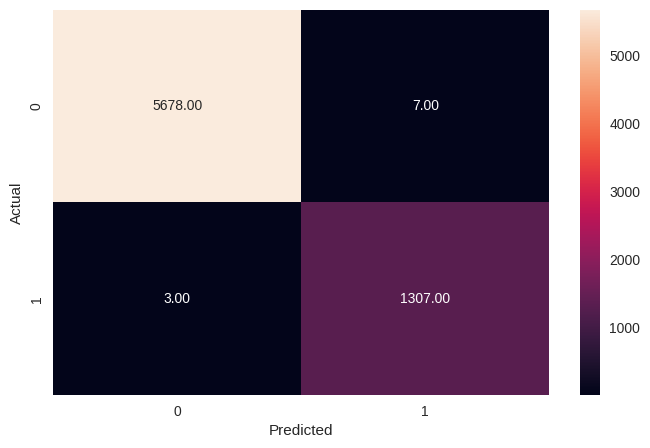

In [ ]:
# Checking performance on the training data
y_pred_train_rf = rf_estimator.predict(x_train)

metrics_score(y_train, y_pred_train_rf)

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      2438
           1       0.86      0.83      0.84       561

    accuracy                           0.94      2999
   macro avg       0.91      0.90      0.90      2999
weighted avg       0.94      0.94      0.94      2999



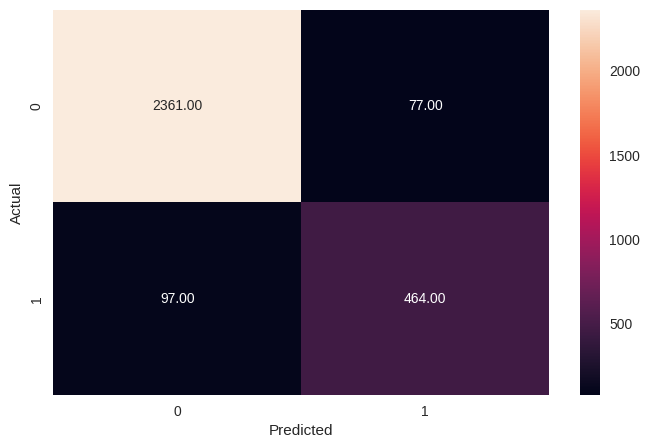

In [ ]:
# Checking performance on the testing data
y_pred_test_rf = rf_estimator.predict(x_test)

metrics_score(y_test, y_pred_test_rf)

**Observações:** Para os dados de treinamento, o modelo obteve uma acurácia de 100% (aredondando o valor de 0.99) para precisão, recall e F1-score, independente do valor de perda. Já para os dados testes, a acurácia variou entre 96-97% para prever valor de zero para perda, e entre 84-86% para prever valores de um para perda.

Os resultados mostram que o modelo foi capaz de prever valores de loss com alta acurácia.


**Observations:** For the training data, the model got the 100% acuracy (rounding the 0.99 value) for precision, recall and F1-score, regardless of loss value. On the other hand, for the testing data, acuracy varied between 96-97% to predict loss as zero, and between 84-86% to predict loss as one

The results show that the model was capable of predicting loss with high acuracy.

**Checando a importância de cada variável para prever perda:**

**Checking the importance of each variable for predicting loss:**

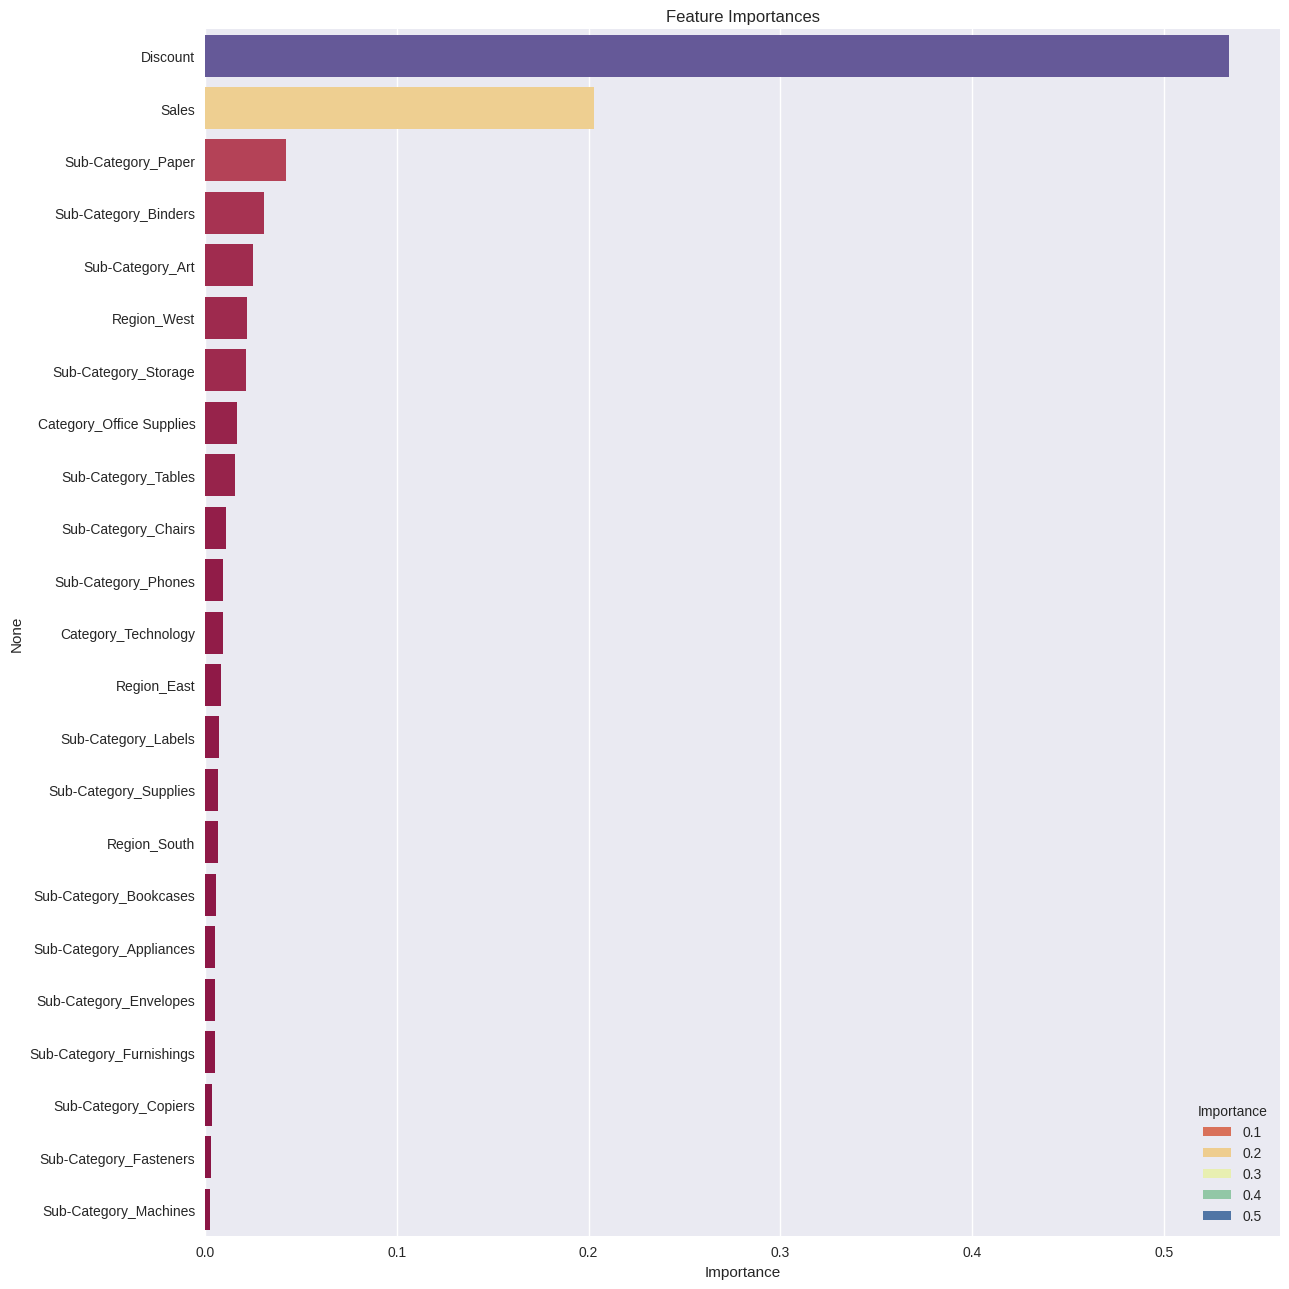

In [ ]:
importances = rf_estimator.feature_importances_  # Getting feature importances values for each dependent variable from the model

columns = x_train.columns   # Dependent variables only

importance_df = pd.DataFrame({
    'Importance': importances
}, index=columns).sort_values(by='Importance', ascending=False)  # Importance in order

plt.figure(figsize=(13, 13))
sns.barplot(data=importance_df, x='Importance', y=importance_df.index, palette="Spectral", hue= 'Importance')  # Barplot with orderly importance of variables
plt.title('Feature Importances')
plt.tight_layout()
plt.show()

**Observações:** As duas variáveis mais importantes foram desconto e vendas. Grande parte das variáveis dummy tiveram pouca importância para prever perda.

**Observations:** The two most important features were discount and sales. Most of the dummy features had low importance to predict loss.

**Checando a fundo as relações importantes entre as variáveis explicativas e perda:**

**Further checking of the important relationships between explanatory variavles and loss:**

In [ ]:
def create_variable_impact_summary(decision_tree, feature_names, x_data, y_data):
    """
    Create a clean summary of how each variable affects loss probability
    """
    # Get feature importance
    importance_df = pd.DataFrame({
        'variable': feature_names,
        'importance': decision_tree.feature_importances_
    }).sort_values('importance', ascending=False)

    impact_summary = []

    for feature in feature_names:
        if decision_tree.feature_importances_[list(feature_names).index(feature)] > 0.001:
            # Calculate average values for loss vs non-loss
            loss_mean = x_data[y_data == 1][feature].mean()
            profit_mean = x_data[y_data == 0][feature].mean()

            # Determine direction of effect
            if loss_mean > profit_mean:
                direction = "INCREASES loss risk"
                effect_size = loss_mean - profit_mean
            else:
                direction = "DECREASES loss risk"
                effect_size = profit_mean - loss_mean

            impact_summary.append({
                'variable': feature,
                'importance': decision_tree.feature_importances_[list(feature_names).index(feature)],
                'direction': direction,
                'avg_when_loss': loss_mean,
                'avg_when_profit': profit_mean,
                'effect_size': effect_size,
                'interpretation': f"Higher {feature} {direction.lower()}"
            })

    return pd.DataFrame(impact_summary).sort_values('importance', ascending=False)

# Create the impact summary
impact_df = create_variable_impact_summary(rf_estimator, x_train.columns, x_train, y_train)
print("Variable Impact Summary:")
print(impact_df.to_string(index=False))

Variable Impact Summary:
                variable  importance           direction  avg_when_loss  avg_when_profit  effect_size                                      interpretation
                Discount    0.533907 INCREASES loss risk       0.479275         0.081583     0.397692                 Higher Discount increases loss risk
                   Sales    0.202685 INCREASES loss risk     259.318913       225.736966    33.581947                    Higher Sales increases loss risk
      Sub-Category_Paper    0.042303 DECREASES loss risk       0.000000         0.168865     0.168865       Higher Sub-Category_Paper decreases loss risk
    Sub-Category_Binders    0.030822 INCREASES loss risk       0.324427         0.110290     0.214137     Higher Sub-Category_Binders increases loss risk
        Sub-Category_Art    0.024768 DECREASES loss risk       0.000000         0.100440     0.100440         Higher Sub-Category_Art decreases loss risk
             Region_West    0.021665 DECREASES loss

**Observações:** Aqui podemos destacar alguns pontos importantes:


*   Sub-categoria fichários (binders) aumenta o risco de perda com tamanho de efeito pequeno mas significativo

*   A sub-categoria papel (paper) e a categoria de material de escritório como um todo reduzem o risco de perda com tamanho de efeito pequeno mas significativo

*   Desconto e vendas aumentam o risco de perda com grande tamanho de efeito para ambos

*   A região Oeste e Sul reduzem o risco de perda, mas a região Leste o aumenta

**Observations:** Here we can highight a few important points:


* Binders sub-category increases loss risk with a small but significant effect size   

*   Paper sub-category and office-supplies category as a whole decrease loss risk with a small but significant effect size

*   Discount and sales increase loss risk with a large effect size for both

*   West and South region decrease loss risk, but East region increases it


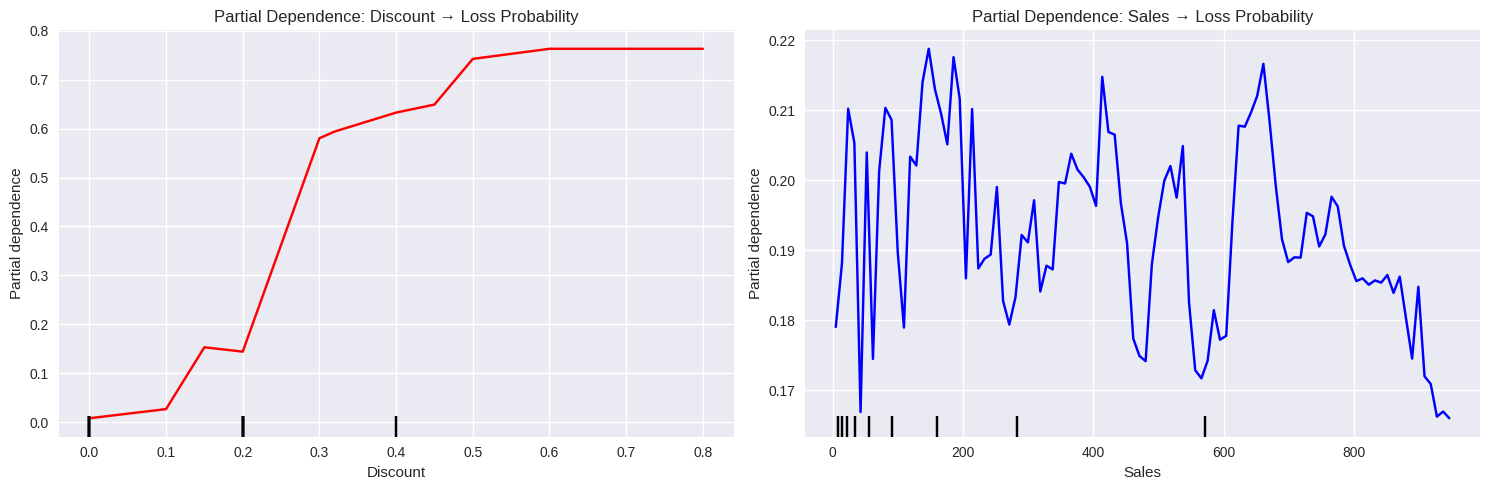

In [ ]:
from sklearn.inspection import PartialDependenceDisplay  # ← ADD THIS IMPORT
# Method 1: Using PartialDependenceDisplay (recommended)
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Partial dependence for Discount
PartialDependenceDisplay.from_estimator(
    rf_estimator, x_train, features=['Discount'],
    ax=ax[0], line_kw={"color": "red"}
)
ax[0].set_title('Partial Dependence: Discount → Loss Probability')
ax[0].axhline(y=0.5, color='black', linestyle='--', alpha=0.3)

# Partial dependence for Sales
PartialDependenceDisplay.from_estimator(
    rf_estimator, x_train, features=['Sales'],
    ax=ax[1], line_kw={"color": "blue"}
)
ax[1].set_title('Partial Dependence: Sales → Loss Probability')
ax[1].axhline(y=0.5, color='black', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

**Observações:** A análise de dependência parcial entre desconto e probabilidade de perda, e entre vendas e probabilidade de perda mostram que:


*   Entre 2% e 3% de desconto a probabilidade de perda aumenta exponencialmente

*   Acima de 3% de desconto, o aumento da probabilidade de perda é mais suave, e a partir de 6% a probabilidade de perda permanece mais ou menos inalterada, com probabilidade de perda de quase 80%

*   A relação de dependência de vendas e probabilidade de perda não apresenta padrão claro. Assim, o aumento de vendas pode aumentar quanto diminuir a probabilidade de perda. Contudo, valores altos mais extremos de vendas estão associados a valores menores de probabilidade de perda  


**Observations:** The partial dependency analysis between discount and loss probability , and sales and loss probability reveal that:

*   Discount between 2% and 3% increases loss probability exponentially

*   Above 3% of discount, probability loss increase is more smooth, and from 6% on the loss probability remains more or less unaffected, with a loss probability of 80%

*   The dependency relationship between sales and loss probability do not display a clear pattern. This way, sales increase can both increase and decrease oss probability. However, extreme high alues of sales are associated with lower loss probability

**Agora vamos analisar como desconto varia de acordo com perda ou ganho financeiro:**

**Now we will analyze how discount varies according to finantial loss or gain:**

In [ ]:
# Focus only on loss cases
loss_cases = data[data['loss'] == 1]

print("DISCOUNT ANALYSIS FOR LOSS CASES:")
print("="*50)
print(f"Total loss cases: {len(loss_cases)}")
print(f"Average discount in loss cases: {loss_cases['Discount'].mean():.1%}")
print(f"Median discount in loss cases: {loss_cases['Discount'].median():.1%}")
print(f"Min discount in loss cases: {loss_cases['Discount'].min():.1%}")
print(f"Max discount in loss cases: {loss_cases['Discount'].max():.1%}")

# Compare with profit cases
profit_cases = data[data['loss'] == 0]
print(f"\nAverage discount in profit cases: {profit_cases['Discount'].mean():.1%}")
print(f"Median discount in loss cases: {profit_cases['Discount'].median():.1%}")
print(f"Min discount in loss cases: {profit_cases['Discount'].min():.1%}")
print(f"Max discount in loss cases: {profit_cases['Discount'].max():.1%}")
print(f"Average Difference in discount: {loss_cases['Discount'].mean() - profit_cases['Discount'].mean():.1%} points")

DISCOUNT ANALYSIS FOR LOSS CASES:
Total loss cases: 1871
Average discount in loss cases: 48.1%
Median discount in loss cases: 40.0%
Min discount in loss cases: 10.0%
Max discount in loss cases: 80.0%

Average discount in profit cases: 8.1%
Median discount in loss cases: 0.0%
Min discount in loss cases: 0.0%
Max discount in loss cases: 40.0%
Average Difference in discount: 39.9% points


In [ ]:
# Check if these high-sales losses have extreme discounts
high_sales_losses = data[data['Sales'] > data['Sales'].median()]
print(f"High-sales loss cases: {len(high_sales_losses)}")
print(f"Average discount in high-sales losses: {high_sales_losses['Discount'].mean():.1%}")

# Compare with profitable high-sales cases
high_sales_profits = data[(data['Sales'] > data['Sales'].median()) & (data['loss'] == 0)]
print(f"Average discount in high-sales profits: {high_sales_profits['Discount'].mean():.1%}")

High-sales loss cases: 4997
Average discount in high-sales losses: 13.5%
Average discount in high-sales profits: 7.9%


In [ ]:
# Find where loss probability jumps significantly
def find_critical_thresholds(data, step=0.05):
    thresholds = []
    for threshold in np.arange(0.05, 0.95, step):
        above_threshold = data[data['Discount'] >= threshold]
        below_threshold = data[data['Discount'] < threshold]

        if len(above_threshold) > 10 and len(below_threshold) > 10:  # Ensure meaningful sample sizes
            loss_rate_above = above_threshold['loss'].mean()
            loss_rate_below = below_threshold['loss'].mean()
            difference = loss_rate_above - loss_rate_below

            thresholds.append({
                'threshold': threshold,
                'loss_rate_above': loss_rate_above,
                'loss_rate_below': loss_rate_below,
                'difference': difference,
                'cases_above': len(above_threshold)
            })

    thresholds_df = pd.DataFrame(thresholds)
    return thresholds_df.sort_values('difference', ascending=False)

critical_thresholds = find_critical_thresholds(data)
print("CRITICAL DISCOUNT THRESHOLDS (Biggest jumps in loss probability):")
print(critical_thresholds.head(10).to_string(index=False))

CRITICAL DISCOUNT THRESHOLDS (Biggest jumps in loss probability):
 threshold  loss_rate_above  loss_rate_below  difference  cases_above
      0.30         0.967696         0.060807    0.906889         1393
      0.25         0.967696         0.060807    0.906889         1393
      0.45         1.000000         0.103521    0.896479          933
      0.50         1.000000         0.104608    0.895392          922
      0.40         0.977173         0.085601    0.891572         1139
      0.35         0.977173         0.085601    0.891572         1139
      0.55         1.000000         0.111075    0.888925          856
      0.60         1.000000         0.124299    0.875701          718
      0.65         1.000000         0.124299    0.875701          718
      0.70         1.000000         0.162059    0.837941          300


In [ ]:
def analyze_discount_sales_ranges(data, bins=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]):
    data['discount_range'] = pd.cut(data['Discount'], bins=bins,
                                   labels=[f'{bins[i]*100:.0f}%-{bins[i+1]*100:.0f}%'
                                           for i in range(len(bins)-1)])

    discount_analysis = data.groupby('discount_range').agg({
        'loss': ['count', 'mean', 'sum'],
        'Profit': ['mean', 'median', 'sum'],
        'Sales': ['mean', 'median', 'sum', 'count'],
        'Discount': 'mean'
    }).round(4)

    # Flatten column names
    discount_analysis.columns = [
        'total_cases', 'loss_rate', 'loss_cases',
        'avg_profit', 'median_profit', 'total_profit',
        'avg_sales', 'median_sales', 'total_sales', 'sales_count',
        'avg_discount'
    ]

    discount_analysis['loss_cases_pct'] = (discount_analysis['loss_cases'] / discount_analysis['loss_cases'].sum()).round(3)
    discount_analysis['profit_margin'] = (discount_analysis['total_profit'] / discount_analysis['total_sales']).round(4)

    return discount_analysis

discount_sales_ranges = analyze_discount_sales_ranges(data)
print("DISCOUNT RANGE ANALYSIS WITH SALES:")
print(discount_sales_ranges)

DISCOUNT RANGE ANALYSIS WITH SALES:
                total_cases  loss_rate  loss_cases  avg_profit  median_profit  \
discount_range                                                                  
0%-10%                   94     0.0426           4     96.0551        54.3240   
10%-20%                3709     0.1399         519     24.7388         6.5340   
20%-30%                 227     0.9163         208    -45.6796       -25.3764   
30%-40%                 233     0.8884         207   -109.2197       -56.7556   
40%-50%                  77     1.0000          77   -298.6953      -184.8366   
50%-60%                 138     1.0000         138    -43.0772       -12.0617   
60%-70%                 418     1.0000         418    -95.8741        -9.2023   
70%-80%                 300     1.0000         300   -101.7968       -14.0498   
80%-90%                   0        NaN           0         NaN            NaN   
90%-100%                  0        NaN           0         NaN           

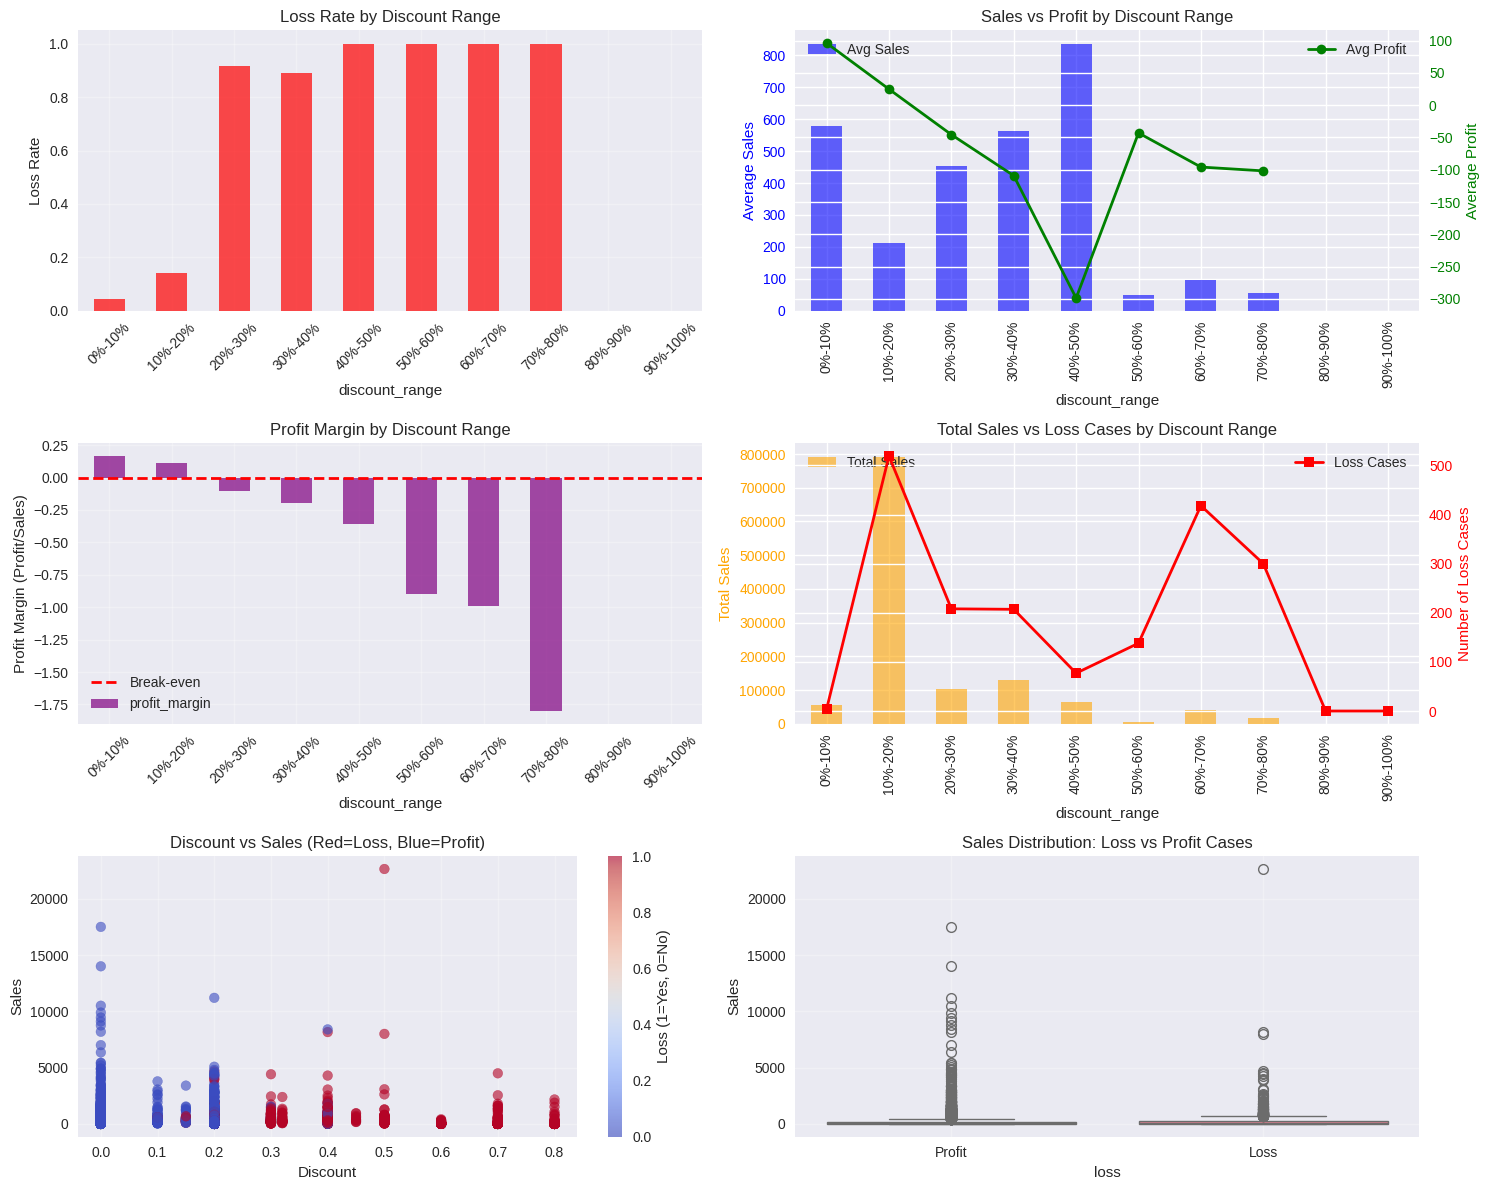

In [ ]:
# Plot 1: Loss rate by discount range
plt.figure(figsize=(15, 12))

plt.subplot(3, 2, 1)
discount_sales_ranges['loss_rate'].plot(kind='bar', color='red', alpha=0.7)
plt.title('Loss Rate by Discount Range')
plt.ylabel('Loss Rate')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Plot 2: Average Sales vs Average Profit by Discount Range
plt.subplot(3, 2, 2)
# Create secondary y-axis
ax1 = plt.gca()
ax2 = ax1.twinx()

# Plot sales (bars)
discount_sales_ranges['avg_sales'].plot(kind='bar', color='blue', alpha=0.6, ax=ax1, label='Avg Sales')
# Plot profit (line)
discount_sales_ranges['avg_profit'].plot(kind='line', color='green', marker='o', linewidth=2, ax=ax2, label='Avg Profit')

ax1.set_ylabel('Average Sales', color='blue')
ax2.set_ylabel('Average Profit', color='green')
ax1.tick_params(axis='y', labelcolor='blue')
ax2.tick_params(axis='y', labelcolor='green')
plt.title('Sales vs Profit by Discount Range')
plt.xticks(rotation=45)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Plot 3: Profit Margin by Discount Range
plt.subplot(3, 2, 3)
discount_sales_ranges['profit_margin'].plot(kind='bar', color='purple', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2, label='Break-even')
plt.title('Profit Margin by Discount Range')
plt.ylabel('Profit Margin (Profit/Sales)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.legend()

# Plot 4: Total Sales vs Total Loss Cases
plt.subplot(3, 2, 4)
ax1 = plt.gca()
ax2 = ax1.twinx()

discount_sales_ranges['total_sales'].plot(kind='bar', color='orange', alpha=0.6, ax=ax1, label='Total Sales')
discount_sales_ranges['loss_cases'].plot(kind='line', color='red', marker='s', linewidth=2, ax=ax2, label='Loss Cases')

ax1.set_ylabel('Total Sales', color='orange')
ax2.set_ylabel('Number of Loss Cases', color='red')
ax1.tick_params(axis='y', labelcolor='orange')
ax2.tick_params(axis='y', labelcolor='red')
plt.title('Total Sales vs Loss Cases by Discount Range')
plt.xticks(rotation=45)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Plot 5: Scatter plot - Discount vs Sales colored by Loss
plt.subplot(3, 2, 5)
scatter = plt.scatter(data['Discount'], data['Sales'],
                     c=data['loss'], cmap='coolwarm', alpha=0.6)
plt.colorbar(scatter, label='Loss (1=Yes, 0=No)')
plt.xlabel('Discount')
plt.ylabel('Sales')
plt.title('Discount vs Sales (Red=Loss, Blue=Profit)')
plt.grid(True, alpha=0.3)

# Plot 6: Sales Distribution in Loss vs Profit Cases
plt.subplot(3, 2, 6)
sns.boxplot(data=data, x='loss', y='Sales')
plt.xticks([0, 1], ['Profit', 'Loss'])
plt.title('Sales Distribution: Loss vs Profit Cases')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

**Resultados:**

*   Houve um total de 1871 vendas que tiveram perda financeira,
e o desconto médio oferecido foi de 48.1%. Para casos onde houve
ganho financeiro, as vendas tiveram desconto médio de 8.1%

*   Para vendas altas houve desconto médio de 13.5% quando houve perda e 7.9% quando houve ganho

*   A partir de 20%, há perda financeira generalizada, havendo margem de lucro negativa. Contudo, ela não aumenta linearmente, mas reduz
de 298.69 (no intervalo de 40%-50% de desconto) para -43.07 (no intervalo de 50%-60% de desconto), mas volta a aumentar posteriormente

*   Na maior parte das vendas foi aplicado desconto entre 10%-20%,
assim gerando ganho financeiro

*   É possivel perceber que a venda com valor mais alto
teve uma perda ao invés de ganho


**Results:**

*   There was a total of 1871 sales that had finantial loss, and the average discount offered was 48.1%. For cases when there was finantial gain, sales had an average of 8.1% discount.

*   For high sales there was an average 13.5 discount when there was loss and 7.9% when there was gain

*   From 20% on, there was a generalized finantial loss, the profit margin being negative. However, it did not increase linearly, but decreased from -298.69 (from the 40%-50% discount range) to -43.07 (from the 50%-60% range), and increases again afterwards

*   On most sales the discount applied was between 10%-20%, this way generating finantial gain

*   It is possible to notice that the sales that had the highest value led to loss instead of gain


**Agora vamos analisar como desconto varia de acordo com perda ou ganho financeiro por região e categoria de produtos:**

**Now we will analyze how discount varies according to finantial loss or gain by region and product category:**

In [ ]:
def analyze_discount_sales_regions_categories(data, bins=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]):
    data['discount_range'] = pd.cut(data['Discount'], bins=bins,
                                   labels=[f'{bins[i]*100:.0f}%-{bins[i+1]*100:.0f}%'
                                           for i in range(len(bins)-1)])

    # Overall analysis
    overall_analysis = data.groupby('discount_range').agg({
        'loss': ['count', 'mean', 'sum'],
        'Profit': ['mean', 'median', 'sum'],
        'Sales': ['mean', 'median', 'sum'],
        'Discount': 'mean'
    }).round(4)

    overall_analysis.columns = [
        'total_cases', 'loss_rate', 'loss_cases',
        'avg_profit', 'median_profit', 'total_profit',
        'avg_sales', 'median_sales', 'total_sales',
        'avg_discount'
    ]

    overall_analysis['loss_cases_pct'] = (overall_analysis['loss_cases'] / overall_analysis['loss_cases'].sum()).round(3)
    overall_analysis['profit_margin'] = (overall_analysis['total_profit'] / overall_analysis['total_sales']).round(4)

    return overall_analysis

# Regional Analysis
def analyze_by_region(data):
    regions = data['Region'].unique()
    regional_analysis = {}

    for region in regions:
        region_data = data[data['Region'] == region]
        analysis = analyze_discount_sales_regions_categories(region_data)
        regional_analysis[region] = analysis

    return regional_analysis

# Category Analysis
def analyze_by_category(data):
    categories = data['Category'].unique()
    category_analysis = {}

    for category in categories:
        category_data = data[data['Category'] == category]
        analysis = analyze_discount_sales_regions_categories(category_data)
        category_analysis[category] = analysis

    return category_analysis

# Region-Category Combined Analysis
def analyze_region_category_combinations(data):
    combinations = data.groupby(['Region', 'Category']).size().reset_index()
    combination_analysis = {}

    for _, combo in combinations.iterrows():
        region, category = combo['Region'], combo['Category']
        combo_data = data[(data['Region'] == region) & (data['Category'] == category)]

        if len(combo_data) > 10:  # Only analyze combinations with enough data
            analysis = analyze_discount_sales_regions_categories(combo_data)
            combination_analysis[f"{region}_{category}"] = analysis

    return combination_analysis

# Run all analyses
print("OVERALL ANALYSIS:")
overall_results = analyze_discount_sales_regions_categories(data)
print(overall_results)

print("\n" + "="*80 + "\n")

print("REGIONAL ANALYSIS:")
regional_results = analyze_by_region(data)
for region, results in regional_results.items():
    print(f"\n--- {region} ---")
    print(results.head(10))

print("\n" + "="*80 + "\n")

print("CATEGORY ANALYSIS:")
category_results = analyze_by_category(data)
for category, results in category_results.items():
    print(f"\n--- {category} ---")
    print(results.head(10))

OVERALL ANALYSIS:
                total_cases  loss_rate  loss_cases  avg_profit  median_profit  \
discount_range                                                                  
0%-10%                   94     0.0426           4     96.0551        54.3240   
10%-20%                3709     0.1399         519     24.7388         6.5340   
20%-30%                 227     0.9163         208    -45.6796       -25.3764   
30%-40%                 233     0.8884         207   -109.2197       -56.7556   
40%-50%                  77     1.0000          77   -298.6953      -184.8366   
50%-60%                 138     1.0000         138    -43.0772       -12.0617   
60%-70%                 418     1.0000         418    -95.8741        -9.2023   
70%-80%                 300     1.0000         300   -101.7968       -14.0498   
80%-90%                   0        NaN           0         NaN            NaN   
90%-100%                  0        NaN           0         NaN            NaN   

         

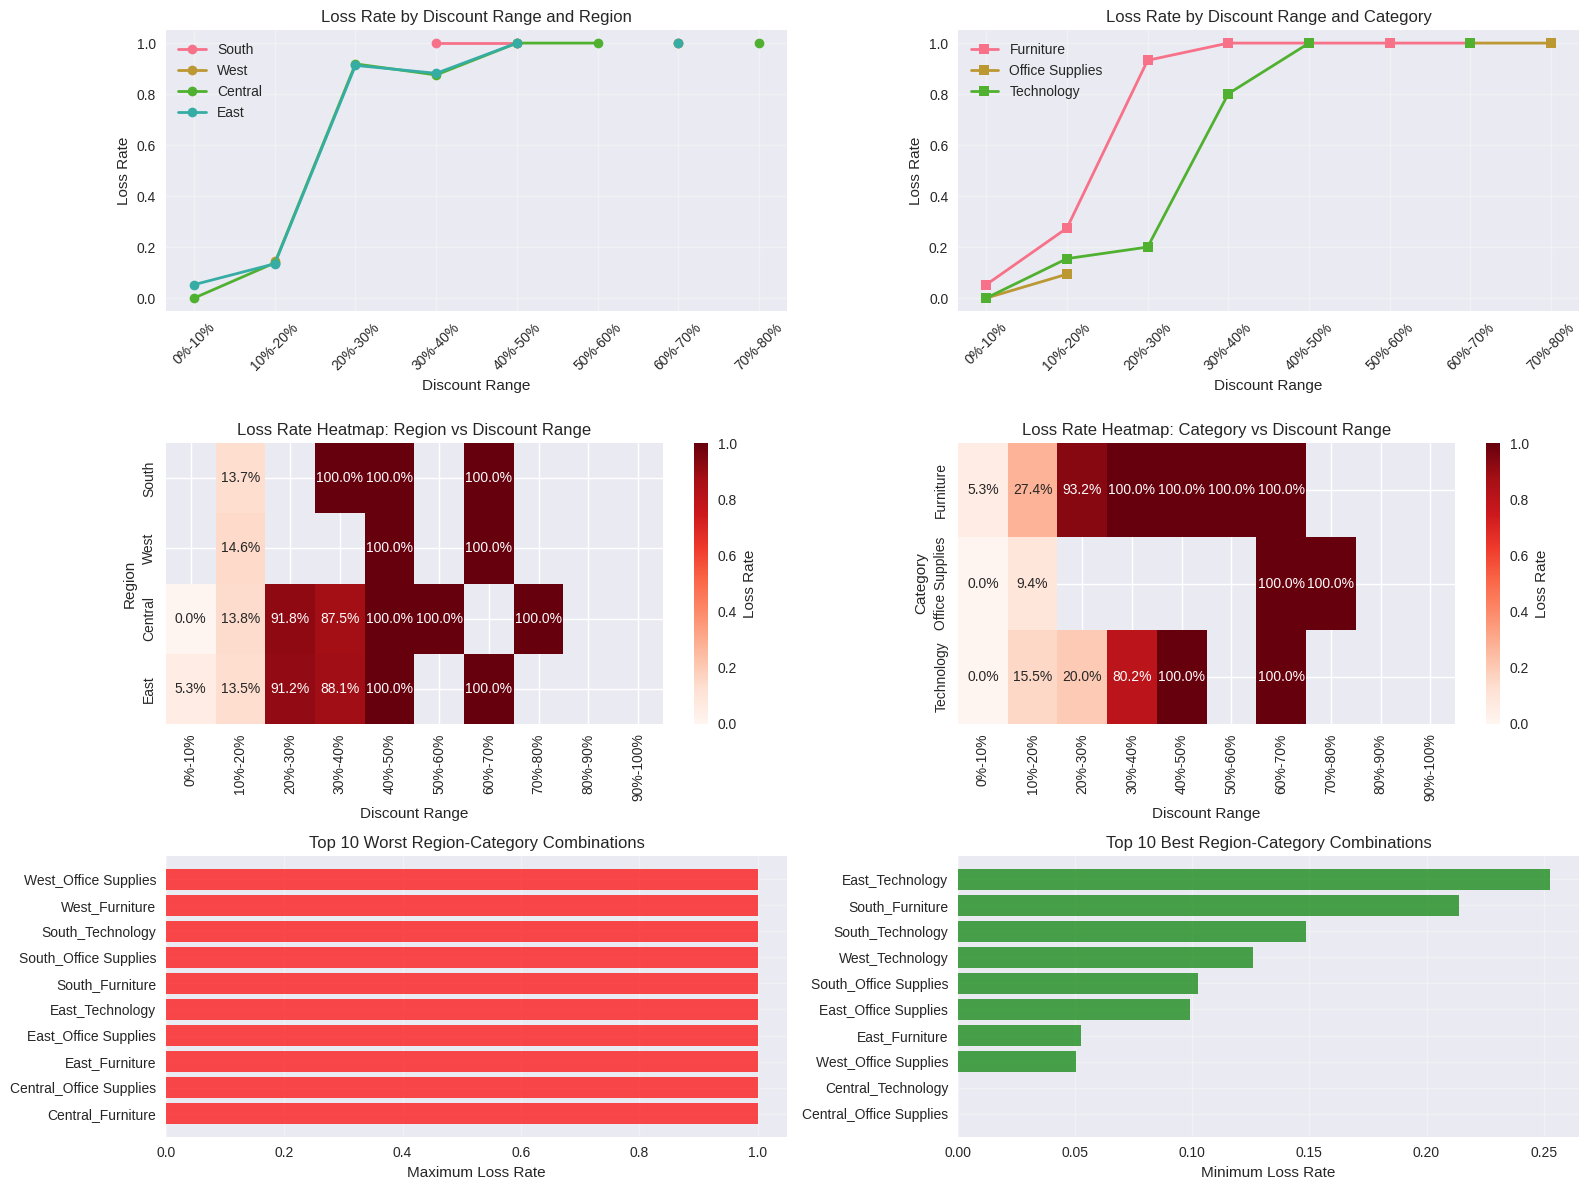

In [ ]:
# Plot 1: Loss Rate by Discount Range and Region
plt.figure(figsize=(16, 12))

plt.subplot(3, 2, 1)
for region in data['Region'].unique():
    region_data = data[data['Region'] == region]
    region_analysis = analyze_discount_sales_regions_categories(region_data)
    plt.plot(region_analysis.index, region_analysis['loss_rate'], marker='o', label=region, linewidth=2)

plt.title('Loss Rate by Discount Range and Region')
plt.ylabel('Loss Rate')
plt.xlabel('Discount Range')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

# Plot 2: Loss Rate by Discount Range and Category
plt.subplot(3, 2, 2)
for category in data['Category'].unique():
    category_data = data[data['Category'] == category]
    category_analysis = analyze_discount_sales_regions_categories(category_data)
    plt.plot(category_analysis.index, category_analysis['loss_rate'], marker='s', label=category, linewidth=2)

plt.title('Loss Rate by Discount Range and Category')
plt.ylabel('Loss Rate')
plt.xlabel('Discount Range')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

# Plot 3: Heatmap - Region vs Discount Range (Loss Rates)
plt.subplot(3, 2, 3)
heatmap_data = []
for region in data['Region'].unique():
    region_data = data[data['Region'] == region]
    region_analysis = analyze_discount_sales_regions_categories(region_data)
    heatmap_data.append(region_analysis['loss_rate'].values)

heatmap_df = pd.DataFrame(heatmap_data,
                         index=data['Region'].unique(),
                         columns=overall_results.index)

sns.heatmap(heatmap_df, annot=True, cmap='Reds', fmt='.1%', cbar_kws={'label': 'Loss Rate'})
plt.title('Loss Rate Heatmap: Region vs Discount Range')
plt.xlabel('Discount Range')
plt.ylabel('Region')

# Plot 4: Heatmap - Category vs Discount Range (Loss Rates)
plt.subplot(3, 2, 4)
heatmap_data_cat = []
for category in data['Category'].unique():
    category_data = data[data['Category'] == category]
    category_analysis = analyze_discount_sales_regions_categories(category_data)
    heatmap_data_cat.append(category_analysis['loss_rate'].values)

heatmap_df_cat = pd.DataFrame(heatmap_data_cat,
                             index=data['Category'].unique(),
                             columns=overall_results.index)

sns.heatmap(heatmap_df_cat, annot=True, cmap='Reds', fmt='.1%', cbar_kws={'label': 'Loss Rate'})
plt.title('Loss Rate Heatmap: Category vs Discount Range')
plt.xlabel('Discount Range')
plt.ylabel('Category')

# Plot 5: Most Dangerous Combinations
plt.subplot(3, 2, 5)
combination_results = analyze_region_category_combinations(data)

# Get top 10 worst combinations
worst_combinations = []
for combo_name, combo_analysis in combination_results.items():
    max_loss_rate = combo_analysis['loss_rate'].max()
    worst_combinations.append((combo_name, max_loss_rate))

worst_combinations.sort(key=lambda x: x[1], reverse=True)
top_10_worst = worst_combinations[:10]

combos, loss_rates = zip(*top_10_worst)
plt.barh(range(len(combos)), loss_rates, color='red', alpha=0.7)
plt.yticks(range(len(combos)), combos)
plt.xlabel('Maximum Loss Rate')
plt.title('Top 10 Worst Region-Category Combinations')
plt.grid(True, alpha=0.3)

# Plot 6: Best Combinations (Lowest Loss Rates)
plt.subplot(3, 2, 6)
best_combinations = []
for combo_name, combo_analysis in combination_results.items():
    min_loss_rate = combo_analysis['loss_rate'].min()
    best_combinations.append((combo_name, min_loss_rate))

best_combinations.sort(key=lambda x: x[1])
top_10_best = best_combinations[:10]

combos_best, loss_rates_best = zip(*top_10_best)
plt.barh(range(len(combos_best)), loss_rates_best, color='green', alpha=0.7)
plt.yticks(range(len(combos_best)), combos_best)
plt.xlabel('Minimum Loss Rate')
plt.title('Top 10 Best Region-Category Combinations')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

⚠️**Resultados:**


*   A região Sul, apesar de aplicar entre 10%-20% de desconto em quase todas as vendas (644), 23 vendas onde o desconto foi entre 40%-50% foi o suficiente para gerar uma perda que supera o ganho. O mesmo não se aplicou às demais regiões, considerando os mesmos
intervalos de desconto.

*   A região Oeste teve maior lucro aplicando descontos entre 10%-20%

*   A regiao sul teve maior perda aplicando descontos entre 40%-50%

*   A região central se destaca pois entre 70%-80% de desconto aplicado a perda financeira foi mais do que o dobro do ganho obtido com 10%-20% de desconto, -30539.03 e 14055.03, respectivamente

*   Materiais de escritório tiveram descontos entre 0%-20% e entre 60%-80%, apresentando perda total por intervalo de desconto que somadas superam os ganhos


*   O setor de tecnologia apresentou perda financeira total entre 30%-50% e entre 60%-70% de desconto. Porém os ganhos com descontos entre 0%-30% superaram as perdas


*   Mobília foi a categoria que mais apresentou perda financeira total. Com descontos variando entre 20% e 70%, houve grandes perdas, destacando a categoria como a que mais gerou prejuízo financeiro à empresa. O prejuízo foi maior desde 0% até 40% de desconto, a partir dai as demais categorias apresentaram taxa de prejuízo similar


*   Mobília foi a categoria que mais ofereceu descontos altos, e também foi a categoria que gerou prejuízo em todas as regiões

*   Produtos de tecnologia no geral foram os que mais evitaram perda financeira em todas as regiões


⚠️**Results:**

*   The South region, despite applying 10%-20% discount in almost all sales (644), 23 sales where discount was between 40%-50% was enough to generate losses that outweighs gains. The same did not happen to other regions, considering the same discount ranges


*   West region had the highest profit applying 10%-20% discounts

*   South region has highest loss applying 40%-50% discounts   

*   Central region stands out because between 70%-80% applied discount the finantial loss was twice higher than the gains obtained from 10%-20% discounts, -30539.03 e 14055.03, respectively


*   Office supplies had discounts between 0%-20% and 60%-80%, having a total loss per discount range that when summed outweights the gains


*   Technology sector showed the highest total finantial loss between 30%-50% and 60%-70% discounts. However, gains from 0%-30% discounts outweighed the losses


*   Furniture was the category that had the highest total finantial loss. Having discounts between 20% and 70%, there was great losses, making it the category that generated the greatest losses for the company. The loss was greater between 0% and 40% discount, from then on the other categories had similar loss rate


*   Furniture was the category that most offered high discounts, and also the category that generated losses in all regions

*   Technology products in general were the ones that better prevented finantial loss in all regions

### ✅ Considerações e recomendações finais

### ✅ Final remarks and recommendations

**Considerações finais e recomendações:**

Algumas observações importantes são feitas através dos resultados:

*   Apesar de representar apenas 18% dos dados, lucro negativo (perda financeira) foi capaz de gerar grandes prejuízos econômicos, especialmente considerando produtos da categoria mobília


*   A região sul e central se destacam pelos grandes prejuízos economicos associados aos descontos dados


*   O valor crítico de desconto é 20%, pois a partir dele as perdas aumentam em grande velocidade e atingem valores acima de 70% de perda

*   Como vendas não demonstrou um padrão muito claro em relação a desconto, possivelmente há produtos específicos que causam aumento de prejuízo financeiro com vendas mais altas

*   Em média oferecer até 8.1% de desconto gera lucro

**Dessa forma, as recomendações são:**


*   Caso ofereça descontos acima de 20%, fazer apenas para produtos de tecnologia e monitorar os lucros frequentemente

*   Evitar descontos acima de 20% para as regiões sul e central

*   Reduzir os descontos oferecidos em produtos de mobília e monitorar vendas e lucros

*   Investigar se há produtos específicos de mobília que estão elevando a taxa de prejuízo financeiro


*   Para cada região, investigar se há cidades específicas que estão puxando a taxa de perda para cima


*   Entender o perfil social e econômico dos clientes em cada região, para entender onde é possível oferecer maiores descontos e obter lucro, e onde oferecer menos desconto ou nenhum desconto e ainda sim manter vendas, e como cada tipo de produto se comporta

**Com a implementação das recomendações dadas, acredita-se que a margem de lucro da empresa irá aumentar. Contudo, é necessário haver monitoramente frequente para entender como cada fator determina se haverá perda ou ganho econômico**

**Final remarks and recommendations:**

Some important observations are based on the results:

*   Despite representing only 18% of the data, negative profit (finantial loss) was capable of generating great economic losses, especially considering furniture products


*  South and Central region stand out due to their high economic losses associated with given discounts


*   The threshold discount value is 20%, from then on loss increases with high velocity and reach values above 70% loss


*   Since sales did not show a clear pattern in relation to discount, possibly  there could be specific products causing the increase of finantial loss with high-valued sales


*   On average offering up until 8.1% discount generates profit


**Therefore, the recommendations are:**

* In case of offering discounts above 20%, do it only for techonology products and monitor profit frequently   


*   To avoid discounts above 20% for South and Central region

*   To reduce offered discounts for furniture products and monitor sales and profit


*   To investigate if there are specific furniture product pushing finantial loss rate up

*   For each region, investigate if there are specific cities pushing loss rate up


*   To understand the social and economic clients profile of each region, to understand where it is possible to offer higher discounts and obtain profit, and where to offer lower or no discounts and still maintain sales, and how each product type behaves

**By implementing the given recommendations, it is believed that the profit margin will increase. However, it is necessary to establish frequent monitoring to understand how each factor determines if there will be economic loss or gain**

